In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

# Construcción de la base de datos a partir de las respuestas de la encuesta

In [ ]:
from google.colab import files
import zipfile
uploaded = files.upload()

Saving archivos stata.zip to archivos stata.zip


In [ ]:
with zipfile.ZipFile("archivos stata.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
dfs = {}
file_names = os.listdir("archivos stata")
for file_name in file_names:
    if file_name.endswith(".dta"):
        if "caracterizacion_tecnologica" in file_name:
            dfs[file_name[:-4]] = pd.read_stata(os.path.join("archivos stata", file_name), convert_categoricals=False)
            continue
        dfs[file_name[:-4]] = pd.read_stata(os.path.join("archivos stata", file_name))

/tmp/ipython-input-510273207.py:8: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  dfs[file_name[:-4]] = pd.read_stata(os.path.join("archivos stata", file_name))
/tmp/ipython-input-510273207.py:8: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  dfs[file_name[:-4]] = pd.read_stata(os.path.join("archivos stata", file_name))
/tmp/ipython-input-510273207.py:8: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can

In [ ]:
print(dfs.keys())
print(file_names)

dict_keys(['ubicaciones', 'agua_riego', 'hortalizas', 'semilleros', 'frutales', 'valores_activos', 'trabajadores', 'produccion', 'ganado', 'caracterizacion_tecnologica', 'predios', 'productos', 'productos_principales', 'individuos', 'miembros'])
['ubicaciones.dta', 'agua_riego.dta', 'hortalizas.dta', 'semilleros.dta', 'frutales.dta', 'valores_activos.dta', 'trabajadores.dta', 'produccion.dta', 'ganado.dta', 'caracterizacion_tecnologica.dta', 'predios.dta', 'productos.dta', 'productos_principales.dta', 'individuos.dta', 'miembros.dta']


In [ ]:
df_predios = dfs["predios"]
df_miembros = dfs["miembros"]
df_trabajadores = dfs["trabajadores"]
df_miembros["p14"] = df_miembros["p14"].replace(999,np.nan)
df_productos = dfs["productos_principales"]
df_ubicaciones = dfs["ubicaciones"]
df_agua = dfs["agua_riego"]
df_produccion = dfs["produccion"]
df_valores_activos = dfs["valores_activos"]
df_caracterizacion = dfs["caracterizacion_tecnologica"]
df_ganado = dfs["ganado"]
df_predios

,folio_interno,iden,nombre,p19,p20,p21,p22,p23_1_total,p23
0,932,1,,PREDIO 1,2.000,99,2.0,2.000,0.0
1,3063,1,,PREDIO 1,9.000,1,9.0,9.000,0.0
2,3249,1,,HJ 5/,5.000,5,5.0,5.000,0.0
3,3513,1,,PREDIO 1,6.000,6,6.0,6.000,0.0
4,2660,1,,PARCELA LA OBRA,15.500,4,8.0,18.000,0.0
...,...,...,...,...,...,...,...,...,...
6711,2761,6,,SAN JOSE II,1.500,1,1.5,9.040,0.0
6712,464,6,,ARAUCO,0.125,1,0.0,0.016,0.0
6713,1627,6,,PREDIO LA CASA,1.000,1,1.0,9.100,0.0
6714,464,7,,LA BAMDA 2,0.125,1,0.0,0.016,0.0


In [ ]:
df_ganado["folio_interno"] = df_produccion["folio_interno"]
df_ganado

,p70_1_1,p70_1_2,p70_1_3,p70_1_4,p70_1_5,p70_1_6,p70_1_7,p70_1_8,p70_1_9,p70_1_10,...,p72_14,p72_15,p72_16,p72_17,p72_18,p72_19,p72_19_otro,p72_20,p72_20_otro,folio_interno
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,4350
1,NaN,NaN,5.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,3825
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,5373
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,5327
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,5049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,4297
5449,1.0,1.0,11.0,0.0,0.0,6.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,4447
5450,NaN,2.0,NaN,7.0,NaN,NaN,10.0,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,3933
5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,2797


In [ ]:
df_ganado = df_ganado.drop(columns = ['p70_1_22', 'p70_1_22_otro',
       'p70_1_23', 'p70_1_23_otro','p70_2_22',
       'p70_2_23',"p72_8",	"p72_8_otro", "p72_9",	"p72_9_otro","p72_7","p72_18", "p72_19",	"p72_19_otro",	"p72_20",	"p72_20_otro"])
df_ganado = df_ganado.apply(pd.to_numeric, errors="coerce")
df_ganado

,p70_1_1,p70_1_2,p70_1_3,p70_1_4,p70_1_5,p70_1_6,p70_1_7,p70_1_8,p70_1_9,p70_1_10,...,p72_6,p72_10,p72_11,p72_12,p72_13,p72_14,p72_15,p72_16,p72_17,folio_interno
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4350
1,NaN,NaN,5.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,...,NaN,30.0,NaN,18.0,14.0,NaN,NaN,NaN,NaN,3825
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5373
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5327
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,...,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4297
5449,1.0,1.0,11.0,0.0,0.0,6.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4447
5450,NaN,2.0,NaN,7.0,NaN,NaN,10.0,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3933
5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2797


In [ ]:
df_caracterizacion["folio_interno"] = df_produccion["folio_interno"]
df_caracterizacion

,p87_1,p87_2,p92_1,p92_2,p94_1,p94_2,p95_1,p95_2,p100_1,p100_2,p106_1,p106_2,p111_1,p111_2,folio_interno
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4350
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3825
2,2.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5373
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5327
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4297
5449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4447
5450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3933
5451,1.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2797


In [ ]:
for column in df_caracterizacion.columns[1:]:
  a = df_caracterizacion[column].value_counts()
  nans = df_caracterizacion[column].isna().sum()
  print(f"NaNs: {nans}")
  print(a)
  print("="*40)

NaNs: 5432
p87_2
1.0    8
0.0    7
3.0    2
2.0    2
4.0    1
5.0    1
Name: count, dtype: int64
NaNs: 4107
p92_1
3.0    587
4.0    272
2.0    259
0.0    106
1.0     79
5.0     35
6.0      8
Name: count, dtype: int64
NaNs: 5432
p92_2
3.0    8
0.0    8
2.0    3
4.0    2
Name: count, dtype: int64
NaNs: 4107
p94_1
1.0    353
2.0    340
4.0    237
3.0    160
0.0    148
5.0     97
6.0     11
Name: count, dtype: int64
NaNs: 5432
p94_2
0.0    9
2.0    6
1.0    3
4.0    2
5.0    1
Name: count, dtype: int64
NaNs: 4978
p95_1
5.0    218
1.0    119
2.0     45
3.0     44
4.0     41
0.0      8
Name: count, dtype: int64
NaNs: 5440
p95_2
5.0    11
2.0     1
4.0     1
Name: count, dtype: int64
NaNs: 4978
p100_1
2.0    184
3.0    114
4.0    104
1.0     27
5.0     22
0.0     22
6.0      2
Name: count, dtype: int64
NaNs: 5440
p100_2
3.0    5
2.0    4
4.0    3
5.0    1
Name: count, dtype: int64
NaNs: 4854
p106_1
5.0    205
1.0    201
2.0    100
4.0     40
3.0     36
0.0     17
Name: count, dtype: int64
NaN

In [ ]:
df_ubicaciones

,folio_interno,macro_zona,region,comuna
0,4350,M6,x los lagos,ANCUD
1,3825,M6,x los lagos,SAN PABLO
2,5373,M3,rm,ALHUE
3,5327,M3,rm,MELIPILLA
4,5049,M6,xiv los ríos,PANGUIPULLI
...,...,...,...,...
5448,4297,M6,x los lagos,CHONCHI
5449,4447,M7,xi aysén,COYHAIQUE
5450,3933,M6,x los lagos,RIO NEGRO
5451,2797,M4,viii bío-bío,LOS ANGELES


In [ ]:
df_trabajadores

,folio_interno,iden,nombre,p34,p35,p36,p37,p38,p39
0,4272,1,,1,1.0,1.0,NaN,NaN,0.0
1,5157,1,,1,1.0,2.0,NaN,NaN,0.0
2,691,1,,1,1.0,1.0,NaN,NaN,0.0
3,1549,1,,1,1.0,1.0,NaN,NaN,0.0
4,4560,1,,1,1.0,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
16329,1792,34,,2,2.0,1.0,10.0,15000.0,NaN
16330,3748,35,,2,2.0,1.0,20.0,20000.0,NaN
16331,3726,35,,2,2.0,1.0,5.0,40000.0,NaN
16332,1792,35,,2,2.0,1.0,10.0,15000.0,NaN


In [ ]:
df_agua

,folio_interno,p28_litros,p28_mc,p29,p31,p32
0,4350,2400.0,NaN,pozo noria,0.0,0.5
1,3825,NaN,0.0,pozo profundo,2.0,3.74
2,5373,NaN,0.0,pozo profundo,0.0,0.25
3,5327,10000.0,NaN,pozo noria,0.0,0.5
4,5049,10000.0,NaN,estero,0.0,0.0
...,...,...,...,...,...,...
5448,4297,NaN,0.0,pozo noria,0.0,2.0
5449,4447,NaN,0.0,ns/nr,0.0,30.0
5450,3933,NaN,0.0,ns/nr,0.0,1.5
5451,2797,NaN,ns/nr,canal,0.0,10.5


In [ ]:
df_produccion

,folio_interno,p41_1_1,p41_1_2,p41_1_3,p41_1_4,p41_1_5,p41_1_6,p41_1_7,p41_1_8,p41_1_9,...,p49_15_preciok,p49_16_preciok,p49_17_preciok,p49_18_preciok,p49_19_preciok,p49_20_preciok,p49_21_preciok,p49_22_preciok,p49_23_preciok,p49_24_preciok
0,4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3825,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5373,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
5449,4447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5450,3933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5451,2797,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for producto in np.unique(df_productos["p79_1"]):
  if "arroz" in producto.lower():
    print(f"{producto}\tSeccion: {df_productos[df_productos["p79_1"] == producto]["p80_seccion_1"].iloc[0]}\t Numero: {df_productos[df_productos["p79_1"] == producto]["p80_num_1"].iloc[0]}")

ARROZ	Seccion: I_A	 Numero: 8.0


In [ ]:
folios = np.unique(df_predios["folio_interno"])
for folio in folios:
  if 1 not in df_miembros[df_miembros['folio_interno'] == folio]["p16"].unique():
    seccion = df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0]
    numero = df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0]
    print(f"Folio: {folio}\tSeccion: {seccion}\tNumero: {numero}")
    df_miembros = df_miembros[df_miembros["folio_interno"] != folio]
    df_trabajadores = df_trabajadores[df_trabajadores["folio_interno"] != folio]
    df_productos = df_productos[df_productos["folio_interno"] != folio]
    df_agua = df_agua[df_agua["folio_interno"] != folio]
    df_produccion = df_produccion[df_produccion["folio_interno"] != folio]
    df_predios = df_predios[df_predios["folio_interno"] != folio]
    df_ubicaciones = df_ubicaciones[df_ubicaciones["folio_interno"] != folio]
    df_valores_activos = df_valores_activos[df_valores_activos["folio_interno"] != folio]
    df_caracterizacion = df_caracterizacion[df_caracterizacion["folio_interno"] != folio]
    df_ganado = df_ganado[df_ganado["folio_interno"] != folio]
    print("Eliminado")

Folio: 310	Seccion: III	Numero: 3.0
Eliminado
Folio: 332	Seccion: III	Numero: 20.0
Eliminado
Folio: 353	Seccion: III	Numero: 20.0
Eliminado
Folio: 597	Seccion: III	Numero: 20.0
Eliminado
Folio: 602	Seccion: IV	Numero: 10.0
Eliminado
Folio: 603	Seccion: XII_F	Numero: 2.0
Eliminado
Folio: 2167	Seccion: XI	Numero: 2.0
Eliminado
Folio: 2255	Seccion: X_A	Numero: 2.0
Eliminado
Folio: 2334	Seccion: I_A	Numero: 6.0
Eliminado
Folio: 2384	Seccion: VII	Numero: 11.0
Eliminado
Folio: 2502	Seccion: III	Numero: 19.0
Eliminado
Folio: 3725	Seccion: I_A	Numero: 1.0
Eliminado
Folio: 3732	Seccion: XII_C	Numero: 27.0
Eliminado
Folio: 3741	Seccion: X_A	Numero: 3.0
Eliminado
Folio: 4004	Seccion: XII_B	Numero: 15.0
Eliminado
Folio: 4028	Seccion: III	Numero: 11.0
Eliminado
Folio: 4112	Seccion: X_B	Numero: 9.0
Eliminado
Folio: 4678	Seccion: X_A	Numero: 4.0
Eliminado
Folio: 4681	Seccion: X_B	Numero: 15.0
Eliminado
Folio: 4746	Seccion: X_A	Numero: 8.0
Eliminado
Folio: 4764	Seccion: X_A	Numero: 7.0
Eliminado
Folio

In [ ]:
folios = np.unique(df_predios["folio_interno"])
df_features = pd.DataFrame({
    "folio_interno": folios,
    # "terreno total (Ha)": [np.sum(df_predios[(df_predios["folio_interno"]==folio) & (df_predios["p21"]!=8)]["p20"]) for folio in folios],
    "Macrozona 1": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M1" else 0 for folio in folios],
    "Macrozona 2": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M2" else 0 for folio in folios],
    "Macrozona 3": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M3" else 0 for folio in folios],
    "Macrozona 4": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M4" else 0 for folio in folios],
    "Macrozona 5": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M5" else 0 for folio in folios],
    "Macrozona 6": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M6" else 0 for folio in folios],
    "Macrozona 7": [1 if df_ubicaciones[df_ubicaciones["folio_interno"] == folio]["macro_zona"].iloc[0] == "M7" else 0 for folio in folios],
    "terreno trabajado (Ha)": [df_predios[(df_predios["folio_interno"]==folio)]["p23_1_total"].unique()[0] for folio in folios],
    "miembros hogar": [len(df_miembros[df_miembros["folio_interno"] == folio]) for folio in folios],
    "total trabajadores": [len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje hombres": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p36"] == 1).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje mujeres": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p36"] == 2).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje miembros": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p35"] == 1).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje no miembros": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p35"] == 2).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje permanentes": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p34"] == 1).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "porcentaje ocasionales": [(df_trabajadores[df_trabajadores["folio_interno"] == folio]["p34"] == 2).sum()/len(df_trabajadores[df_trabajadores["folio_interno"] == folio]) for folio in folios],
    "edad promedio miembros": [np.mean(df_miembros[df_miembros["folio_interno"] == folio ]["p14"]) for folio in folios],
    # "edad mediana miembros": [np.median(df_miembros[df_miembros["folio_interno"] == folio ]["p14"]) for folio in folios],
    "des. estandar edad miembros": [np.std(df_miembros[df_miembros["folio_interno"] == folio ]["p14"]) for folio in folios],
    "edad mayor miembros": [np.max(df_miembros[df_miembros["folio_interno"] == folio ]["p14"]) for folio in folios],
    # "edad menor trabajadores": [np.min(df_miembros[df_miembros["folio_interno"] == folio ]["p14"]) for folio in folios],
    "miembros sin edad": [np.sum(df_miembros[df_miembros["folio_interno"] == folio ]["p14"].isna()) for folio in folios],
    "edad jefe de hogar": [df_miembros[(df_miembros["p16"] == 1 ) & (df_miembros["folio_interno"] == folio )]["p14"].iloc[0] for folio in folios],
    "sexo jefe de hogar": [1 if df_miembros[(df_miembros["p16"] == 1) & (df_miembros["folio_interno"] == folio)]["p15"].iloc[0] == 2 else 0 for folio in folios], # 1 mujer, 0 hombre
    "superficie con drenaje (Ha)": [df_agua[df_agua["folio_interno"] == folio]["p31"].iloc[0] for folio in folios],
    "Tractores": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_1"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_1"].iloc[0] == "sí" else 0 for folio in folios],
    "Enfardadoras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_2"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_2"].iloc[0] == "sí" else 0 for folio in folios],
    "Cosechadoras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_3"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_3"].iloc[0] == "sí" else 0 for folio in folios],
    "Fumigadoras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_5"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_5"].iloc[0] == "sí" else 0 for folio in folios],
    "Monocultivadoras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_6"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_6"].iloc[0] == "sí" else 0 for folio in folios],
    "Desbrozadoras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_7"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_7"].iloc[0] == "sí" else 0 for folio in folios],
    "Motobombas": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_8"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_8"].iloc[0] == "sí" else 0 for folio in folios],
    "Arados y/o rastras": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_9"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_9"].iloc[0] == "sí" else 0 for folio in folios],
    "Equipos de riego": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_12"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_12"].iloc[0] == "sí" else 0 for folio in folios],
    "Camiones": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_14"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_14"].iloc[0] == "sí" else 0 for folio in folios],
    "Camionetas y/o autos": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_15"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_15"].iloc[0] == "sí" else 0 for folio in folios],
    "Invernaderos": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_17"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_17"].iloc[0] == "sí" else 0 for folio in folios],
    "Bodegas": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_18"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_18"].iloc[0] == "sí" else 0 for folio in folios],
    "Galpones": [df_valores_activos[df_valores_activos["folio_interno"] == folio]["p172_19"].iloc[0] if df_valores_activos[df_valores_activos["folio_interno"] == folio]["p171_19"].iloc[0] == "sí" else 0 for folio in folios],
    "Ganado": [df_ganado[df_ganado["folio_interno"] == folio].drop(columns = ["folio_interno"]).sum(axis=1).iloc[0] for folio in folios],
    "Maíz": [1 if df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0] in [6.0, 7.0] and df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0] == "I_A"  else 0 for folio in folios],
    "Tomate": [1 if df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0] == 19.0 and df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0] == "III"  else 0 for folio in folios],
    "Trigo": [1 if df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0] == 1.0 and df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0] == "I_A"  else 0 for folio in folios],
    "Papa": [1 if df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0] == 17.0 and df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0] == "I_C"  else 0 for folio in folios],
    "Cebolla": [1 if df_productos[df_productos["folio_interno"] == folio]["p82_num"].iloc[0] in [6.0, 7.0] and df_productos[df_productos["folio_interno"] == folio]["p82_seccion"].iloc[0] == "III"  else 0 for folio in folios],
})
for tipo in df_agua["p29"].unique():
  df_features[f"fuente {tipo}"] = [1 if df_agua[df_agua['folio_interno'] == folio]["p29"].iloc[0] == tipo else 0 for folio in folios]
df_features

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente pozo profundo,fuente estero,fuente canal,fuente ns/nr,fuente vertiente,fuente laguna,fuente otra,fuente río,fuente embalse,fuente lago
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,6.0,3,...,0,0,1,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,2.0,4,...,0,0,1,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,11025,0,0,1,0,0,0,0,2.0,3,...,0,0,1,0,0,0,0,0,0,0
5423,11031,0,0,0,0,0,0,1,10.0,3,...,0,0,0,0,0,0,0,0,1,0
5424,11032,0,0,0,0,0,0,1,400.0,1,...,0,1,0,0,0,0,0,0,0,0
5425,11033,0,0,0,1,0,0,0,1.5,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
activos = ["Tractores", "Enfardadoras", "Cosechadoras", "Fumigadoras", "Monocultivadoras", "Desbrozadoras", "Motobombas", "Arados y/o rastras", "Equipos de riego", "Camiones", "Camionetas y/o autos", "Invernaderos", "Bodegas", "Galpones"]

df_features = df_features[~df_features[activos].isin(["ns/nr"]).any(axis=1)]
df_features

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente pozo profundo,fuente estero,fuente canal,fuente ns/nr,fuente vertiente,fuente laguna,fuente otra,fuente río,fuente embalse,fuente lago
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,6.0,3,...,0,0,1,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,2.0,4,...,0,0,1,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,11025,0,0,1,0,0,0,0,2.0,3,...,0,0,1,0,0,0,0,0,0,0
5423,11031,0,0,0,0,0,0,1,10.0,3,...,0,0,0,0,0,0,0,0,1,0
5424,11032,0,0,0,0,0,0,1,400.0,1,...,0,1,0,0,0,0,0,0,0,0
5425,11033,0,0,0,1,0,0,0,1.5,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cols = ["Maíz", "Tomate", "Trigo", "Papa","Cebolla"]

df_features = df_features[~((df_features[cols[0]] == 0) &
          (df_features[cols[1]] == 0) &
          (df_features[cols[2]] == 0) &
          (df_features[cols[3]] == 0) &
          (df_features[cols[4]] == 0))]
df_features

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente pozo profundo,fuente estero,fuente canal,fuente ns/nr,fuente vertiente,fuente laguna,fuente otra,fuente río,fuente embalse,fuente lago
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,6.0,3,...,0,0,1,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,1,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,9.0,4,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,11016,0,0,0,0,1,0,0,4.0,2,...,1,0,0,0,0,0,0,0,0,0
5416,11018,0,0,0,0,1,0,0,10.0,3,...,1,0,0,0,0,0,0,0,0,0
5419,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0,0,1,0,0,0,0,0
5420,11022,0,0,0,0,1,0,0,3.0,3,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Crear dataframe con producto principal (copia explícita para evitar referencias)
productos = pd.DataFrame({
    "folio_interno": df_features["folio_interno"].copy(),
    "producto": df_features[cols].idxmax(axis=1).copy()
})

kilos = []
ha_riego = []
ha_secano = []
m2_aire_libre = []
m2_invernadero = []

for folio in df_features["folio_interno"].unique():
    prod = productos.loc[productos["folio_interno"] == folio, "producto"].iloc[0]

    match prod:
        case "Maíz":
            if df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 6.0:
                ha_riego.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_1_6"].iloc[0])
                ha_secano.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_2_6"].iloc[0])
            elif df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 7.0:
                ha_riego.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_1_7"].iloc[0])
                ha_secano.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_2_7"].iloc[0])
            m2_aire_libre.append(0)
            m2_invernadero.append(0)

        case "Tomate":
            ha_riego.append(0)
            ha_secano.append(0)
            m2_aire_libre.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_1_19"].iloc[0])
            m2_invernadero.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_2_19"].iloc[0])

        case "Trigo":
            ha_riego.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_1_1"].iloc[0])
            ha_secano.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_2_1"].iloc[0])
            m2_aire_libre.append(0)
            m2_invernadero.append(0)

        case "Papa":
            ha_riego.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_1_17"].iloc[0])
            ha_secano.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p41_2_17"].iloc[0])
            m2_aire_libre.append(0)
            m2_invernadero.append(0)

        case "Cebolla":
            ha_riego.append(0)
            ha_secano.append(0)
            if df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 6.0:
                m2_aire_libre.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_1_6"].iloc[0])
                m2_invernadero.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_2_6"].iloc[0])
            elif df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 7.0:
                m2_aire_libre.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_1_7"].iloc[0])
                m2_invernadero.append(df_produccion.loc[df_produccion["folio_interno"] == folio, "p47_2_7"].iloc[0])

# Crear una copia para no modificar df_features original
df_features_out = df_features.copy()

# Asignar nuevas columnas
df_features_out["Superficie de riego (Ha)"] = ha_riego
df_features_out["Superficie de secano (Ha)"] = ha_secano
df_features_out["Superficie de aire libre (m2)"] = m2_aire_libre
df_features_out["Superficie de invernadero (m2)"] = m2_invernadero

df_features_out = df_features_out[~((df_features_out["Superficie de riego (Ha)"] == "ns/nr") &
                                  (df_features_out["Superficie de secano (Ha)"] == "ns/nr") &
                                  (df_features_out["Superficie de aire libre (m2)"] == "ns/nr") &
                                  (df_features_out["Superficie de invernadero (m2)"] == "ns/nr"))]


df_features_out


,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente vertiente,fuente laguna,fuente otra,fuente río,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0,0,0,0,0,0,0.0,50000.0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0,0,0,0,0.0,10000.0
2,3,1,0,0,0,0,0,0,6.0,3,...,0,0,0,0,0,0,6.0,0.0,0,0
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0,0,0,0,0,0,0.25,1.5
8,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0,0,0,0,0,0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0,0,0,0,0.0,0.5,0,0
5416,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0,0,0,0,0.0,2.0,0,0
5419,11021,0,0,0,0,1,0,0,8.0,1,...,1,0,0,0,0,0,0.0,3.0,0,0
5420,11022,0,0,0,0,1,0,0,3.0,3,...,0,0,0,0,0,0,0.0,0.5,0,0


In [ ]:
df_caracterizacion["asesoria_unificada"] =  (
    df_caracterizacion["p95_1"].combine_first(df_caracterizacion["p106_1"])
)
df_caracterizacion["fertilizacion_unificada"] =  (
    df_caracterizacion["p100_1"].combine_first(df_caracterizacion["p111_1"])
)

df_caracterizacion

,p87_1,p87_2,p92_1,p92_2,p94_1,p94_2,p95_1,p95_2,p100_1,p100_2,p106_1,p106_2,p111_1,p111_2,folio_interno,asesoria_unificada,fertilizacion_unificada
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4350,1.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3825,NaN,NaN
2,2.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5373,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5327,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4297,NaN,NaN
5449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4447,NaN,NaN
5450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3933,NaN,NaN
5451,1.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2797,NaN,NaN


In [ ]:
fertilizacion = []
asesoria_tecnica = []

for folio in df_features_out["folio_interno"].unique():
    prod = productos.loc[productos["folio_interno"] == folio, "producto"].iloc[0]
    match prod:
        case "Maíz":
            asesoria_tecnica.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p87_1"].iloc[0])
            fertilizacion.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p92_1"].iloc[0])
        case "Trigo":
            asesoria_tecnica.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p87_1"].iloc[0])
            fertilizacion.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p92_1"].iloc[0])
        case "Papa":
            asesoria_tecnica.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p87_1"].iloc[0])
            fertilizacion.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["p92_1"].iloc[0])
        case "Tomate":
            asesoria_tecnica.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["asesoria_unificada"].iloc[0])
            fertilizacion.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["fertilizacion_unificada"].iloc[0])
        case "Cebolla":
            asesoria_tecnica.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["asesoria_unificada"].iloc[0])
            fertilizacion.append(df_caracterizacion[df_caracterizacion["folio_interno"] == folio]["fertilizacion_unificada"].iloc[0])
df_features_2 = df_features_out.copy()
df_features_2["asesoria técnica"] = asesoria_tecnica
df_features_2["fertilizacion"] = fertilizacion
df_features_2.value_counts("fertilizacion")



,count
fertilizacion,
3.0,502
4.0,266
2.0,196
0.0,86
1.0,42
5.0,37
6.0,4


In [ ]:
df_features_2.value_counts("asesoria técnica")

,count
asesoria técnica,
1.0,443
5.0,314
2.0,148
3.0,89
4.0,80
0.0,59


In [ ]:
produccion_kg = []
producto_interno_bruto = []
productos_en_kg = 0

# Recorremos usando df_features_out, no df_features
for folio in df_features_out["folio_interno"].unique():
    prod = productos.loc[productos["folio_interno"] == folio, "producto"].iloc[0]

    match prod:
        case "Maíz":
            if df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 6.0:
                pregunta_cantidad = "p42_1_1_6"
                pregunta_equivalencia = "p42_2_1_6"
                pregunta_unidad = "p42_2_2_6"
                cantidad_vendida = "p43_1_6"
                precio_unitario = "p43_2_6"
            elif df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 7.0:
                pregunta_cantidad = "p42_1_1_7"
                pregunta_equivalencia = "p42_2_1_7"
                pregunta_unidad = "p42_2_2_7"
                cantidad_vendida = "p43_1_7"
                precio_unitario = "p43_2_7"
            else:
                print("Error")

        case "Tomate":
            pregunta_cantidad = "p48_1_1_19"
            pregunta_equivalencia = "p48_2_1_19"
            pregunta_unidad = "p48_2_2_19"
            cantidad_vendida = "p49_1_19"
            precio_unitario = "p49_2_19"

        case "Trigo":
            pregunta_cantidad = "p42_1_1_1"
            pregunta_equivalencia = "p42_2_1_1"
            pregunta_unidad = "p42_2_2_1"
            cantidad_vendida = "p43_1_1"
            precio_unitario = "p43_2_1"

        case "Papa":
            pregunta_cantidad = "p42_1_1_17"
            pregunta_equivalencia = "p42_2_1_17"
            pregunta_unidad = "p42_2_2_17"
            cantidad_vendida = "p43_1_17"
            precio_unitario = "p43_2_17"

        case "Cebolla":
            if df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 6.0:
                pregunta_cantidad = "p48_1_1_6"
                pregunta_equivalencia = "p48_2_1_6"
                pregunta_unidad = "p48_2_2_6"
                cantidad_vendida = "p49_1_6"
                precio_unitario = "p49_2_6"
            elif df_productos.loc[df_productos["folio_interno"] == folio, "p82_num"].iloc[0] == 7.0:
                pregunta_cantidad = "p48_1_1_7"
                pregunta_equivalencia = "p48_2_1_7"
                pregunta_unidad = "p48_2_2_7"
                cantidad_vendida = "p49_1_7"
                precio_unitario = "p49_2_7"
            else:
                print("Error")

    # Validamos unidad de medida
    unidad = df_produccion.loc[df_produccion["folio_interno"] == folio, pregunta_unidad].iloc[0]
    if unidad in ["KILOS", "KILO"]:
        a = df_produccion.loc[df_produccion["folio_interno"] == folio, pregunta_cantidad].iloc[0]
        b = df_produccion.loc[df_produccion["folio_interno"] == folio, pregunta_equivalencia].iloc[0]
        c = df_produccion.loc[df_produccion["folio_interno"] == folio, cantidad_vendida].iloc[0]
        d = df_produccion.loc[df_produccion["folio_interno"] == folio, precio_unitario].iloc[0]

        if isinstance(a, str) or isinstance(b, str):
            cantidad_kg = None
        else:
            cantidad_kg = a * b

        produccion_kg.append(cantidad_kg)


        if (cantidad_kg is None) or isinstance(d, str):
            precio_kg = None
        else:
            precio_kg = cantidad_kg * d

        producto_interno_bruto.append(precio_kg)
        productos_en_kg += 1
        print(f"Producto:\t{prod}\tCantidad producida:\t{cantidad_kg} kg\tCantidad vendida:\t{c} kg\tPrecio:\t{d} CLP")
    else:
        produccion_kg.append(None)
        producto_interno_bruto.append(None)


print(productos_en_kg)

# Crear copia para no modificar df_features_out
df_features_final = df_features_2.copy()
df_features_final["produccion (kg)"] = produccion_kg
df_features_final["PIB (CLP)"] = producto_interno_bruto

df_features_final


Producto:	Tomate	Cantidad producida:	480000.0 kg	Cantidad vendida:	30000.0 kg	Precio:	5000.0 CLP
Producto:	Tomate	Cantidad producida:	112000.0 kg	Cantidad vendida:	7000.0 kg	Precio:	5000.0 CLP
Producto:	Tomate	Cantidad producida:	140000.0 kg	Cantidad vendida:	7000.0 kg	Precio:	10000.0 CLP
Producto:	Cebolla	Cantidad producida:	10800.0 kg	Cantidad vendida:	600.0 kg	Precio:	5000.0 CLP
Producto:	Tomate	Cantidad producida:	600.0 kg	Cantidad vendida:	50.0 kg	Precio:	5000.0 CLP
Producto:	Tomate	Cantidad producida:	5000.0 kg	Cantidad vendida:	250.0 kg	Precio:	4000.0 CLP
Producto:	Maíz	Cantidad producida:	7360.0 kg	Cantidad vendida:	160.0 kg	Precio:	10000.0 CLP
Producto:	Tomate	Cantidad producida:	1000.0 kg	Cantidad vendida:	1.0 kg	Precio:	300000.0 CLP
Producto:	Tomate	Cantidad producida:	480000.0 kg	Cantidad vendida:	30000.0 kg	Precio:	5000.0 CLP
Producto:	Maíz	Cantidad producida:	10000.0 kg	Cantidad vendida:	200.0 kg	Precio:	10000.0 CLP
Producto:	Tomate	Cantidad producida:	12480.0 kg	Cantidad

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0,0,0.0,50000.0,5.0,5.0,480000.0,2.400000e+09
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0.0,10000.0,5.0,5.0,112000.0,5.600000e+08
2,3,1,0,0,0,0,0,0,6.0,3,...,0,0,6.0,0.0,0,0,5.0,3.0,NaN,NaN
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0,0,0.25,1.5,5.0,4.0,140000.0,1.400000e+09
8,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0,0,8.0,0.0,1.0,4.0,10800.0,5.400000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0.0,0.5,0,0,2.0,0.0,60000.0,7.200000e+08
5416,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0.0,2.0,0,0,2.0,2.0,50000.0,2.000000e+08
5419,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0.0,3.0,0,0,2.0,3.0,350000.0,4.900000e+09
5420,11022,0,0,0,0,1,0,0,3.0,3,...,0,0,0.0,0.5,0,0,2.0,3.0,25000.0,7.500000e+07


In [ ]:
df_c = df_features_final.dropna(subset = ["PIB (CLP)"])
df_c

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0,0,0.0,50000.0,5.0,5.0,480000.0,2.400000e+09
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0.0,10000.0,5.0,5.0,112000.0,5.600000e+08
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0,0,0.25,1.5,5.0,4.0,140000.0,1.400000e+09
8,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0,0,8.0,0.0,1.0,4.0,10800.0,5.400000e+07
10,11,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0.0,5000.0,5.0,5.0,600.0,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0.0,0.5,0,0,2.0,0.0,60000.0,7.200000e+08
5416,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0.0,2.0,0,0,2.0,2.0,50000.0,2.000000e+08
5419,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0.0,3.0,0,0,2.0,3.0,350000.0,4.900000e+09
5420,11022,0,0,0,0,1,0,0,3.0,3,...,0,0,0.0,0.5,0,0,2.0,3.0,25000.0,7.500000e+07


In [ ]:
df_c = df_c[~((df_c["Superficie de riego (Ha)"] == "sí") | (df_c["Superficie de riego (Ha)"] == "no") | (df_c["Superficie de riego (Ha)"] == np.nan))]
df_c["asesoria técnica"] = df_c["asesoria técnica"].apply(lambda x: 1 if x in [2,3,4,5] else 0)
df_c["fertilizacion"] = df_c["fertilizacion"].apply(lambda x: 1 if x in [2,3,4,5,6] else 0)
df_c

/tmp/ipython-input-1630828239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["asesoria técnica"] = df_c["asesoria técnica"].apply(lambda x: 1 if x in [2,3,4,5] else 0)
/tmp/ipython-input-1630828239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["fertilizacion"] = df_c["fertilizacion"].apply(lambda x: 1 if x in [2,3,4,5,6] else 0)


,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0,0,0.0,50000.0,1,1,480000.0,2.400000e+09
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0.0,10000.0,1,1,112000.0,5.600000e+08
4,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0,0,0.25,1.5,1,1,140000.0,1.400000e+09
8,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0,0,8.0,0.0,0,1,10800.0,5.400000e+07
10,11,1,0,0,0,0,0,0,1.0,6,...,0,0,0,0,0.0,5000.0,1,1,600.0,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,10035,0,0,0,0,0,1,0,2.0,2,...,0,0,0.0,1.0,0,0,1,1,6000.0,4.800000e+07
5414,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0.0,0.5,0,0,1,0,60000.0,7.200000e+08
5416,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0.0,2.0,0,0,1,1,50000.0,2.000000e+08
5419,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0.0,3.0,0,0,1,1,350000.0,4.900000e+09


In [ ]:
df_final = df_c.dropna()
df_final.to_csv("df_final.csv")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supongamos que ya tienes un DataFrame df_features solo con las variables numéricas
X = df_3.dropna().select_dtypes(include=[float, int])
# Calculamos VIF para cada columna
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Macrozona 1,inf
1,Macrozona 2,inf
2,Macrozona 3,inf
3,Macrozona 4,inf
4,Macrozona 5,inf
5,Macrozona 6,inf
6,Macrozona 7,inf
7,terreno trabajado (Ha),1.302498
8,miembros hogar,3.348400
9,total trabajadores,2.145513


# Preprocesamiento de la base de datos y entrenamiento de modelos de regresión

In [2]:
from google.colab import files
uploaded = files.upload()

!pip install gurobipy
import gurobipy as grb
print(grb.gurobi.version())
os.environ['GRB_LICENSE_FILE'] = '/content/gurobi.lic'
print(os.environ['GRB_LICENSE_FILE'])

Saving gurobi.lic to gurobi.lic
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 109.4 MB/s eta 0:00:00
(13, 0, 0)
/content/gurobi.lic


In [3]:
from google.colab import files
uploaded = files.upload()

Saving df_final.csv to df_final.csv


In [50]:
df = pd.read_csv("df_final.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0.0,0,0.0,50000.0,1,1,480000.0,2.400000e+09
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0.0,0,0.0,10000.0,1,1,112000.0,5.600000e+08
2,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0.0,0,0.25,1.5,1,1,140000.0,1.400000e+09
3,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0.0,0,8.0,0.0,0,1,10800.0,5.400000e+07
4,11,1,0,0,0,0,0,0,1.0,6,...,0,0,0.0,0,0.0,5000.0,1,1,600.0,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,10035,0,0,0,0,0,1,0,2.0,2,...,0,0,0.0,1.0,0,0,1,1,6000.0,4.800000e+07
839,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0.0,0.5,0,0,1,0,60000.0,7.200000e+08
840,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0.0,2.0,0,0,1,1,50000.0,2.000000e+08
841,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0.0,3.0,0,0,1,1,350000.0,4.900000e+09


In [51]:
for columna in df.columns:
  if "ns/nr" in df[columna].unique():
    print(f"{columna}\tDetectado")

Superficie de secano (Ha)	Detectado
Superficie de aire libre (m2)	Detectado
Superficie de invernadero (m2)	Detectado


In [52]:
df = df[~df.isin(["ns/nr"]).any(axis=1)].copy()
cols_to_convert = ["Superficie de secano (Ha)",
                   "Superficie de aire libre (m2)",
                   "Superficie de invernadero (m2)"]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente embalse,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0,0.0,0.0,0.00,50000.0,1,1,480000.0,2.400000e+09
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0,0.0,0.0,0.00,10000.0,1,1,112000.0,5.600000e+08
2,5,1,0,0,0,0,0,0,2.5,6,...,0,0,0.0,0.0,0.25,1.5,1,1,140000.0,1.400000e+09
3,9,1,0,0,0,0,0,0,9.0,4,...,0,0,0.0,0.0,8.00,0.0,0,1,10800.0,5.400000e+07
4,11,1,0,0,0,0,0,0,1.0,6,...,0,0,0.0,0.0,0.00,5000.0,1,1,600.0,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,10035,0,0,0,0,0,1,0,2.0,2,...,0,0,0.0,1.0,0.00,0.0,1,1,6000.0,4.800000e+07
839,11016,0,0,0,0,1,0,0,4.0,2,...,0,0,0.0,0.5,0.00,0.0,1,0,60000.0,7.200000e+08
840,11018,0,0,0,0,1,0,0,10.0,3,...,0,0,0.0,2.0,0.00,0.0,1,1,50000.0,2.000000e+08
841,11021,0,0,0,0,1,0,0,8.0,1,...,0,0,0.0,3.0,0.00,0.0,1,1,350000.0,4.900000e+09


In [53]:
df["PIB (MCLP)"] = df["PIB (CLP)"] / 1000000
df

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP),PIB (MCLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0.0,0.0,0.00,50000.0,1,1,480000.0,2.400000e+09,2400.0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0.0,0.0,0.00,10000.0,1,1,112000.0,5.600000e+08,560.0
2,5,1,0,0,0,0,0,0,2.5,6,...,0,0.0,0.0,0.25,1.5,1,1,140000.0,1.400000e+09,1400.0
3,9,1,0,0,0,0,0,0,9.0,4,...,0,0.0,0.0,8.00,0.0,0,1,10800.0,5.400000e+07,54.0
4,11,1,0,0,0,0,0,0,1.0,6,...,0,0.0,0.0,0.00,5000.0,1,1,600.0,3.000000e+06,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,10035,0,0,0,0,0,1,0,2.0,2,...,0,0.0,1.0,0.00,0.0,1,1,6000.0,4.800000e+07,48.0
839,11016,0,0,0,0,1,0,0,4.0,2,...,0,0.0,0.5,0.00,0.0,1,0,60000.0,7.200000e+08,720.0
840,11018,0,0,0,0,1,0,0,10.0,3,...,0,0.0,2.0,0.00,0.0,1,1,50000.0,2.000000e+08,200.0
841,11021,0,0,0,0,1,0,0,8.0,1,...,0,0.0,3.0,0.00,0.0,1,1,350000.0,4.900000e+09,4900.0


In [54]:
df = df[df["PIB (CLP)"] != 0]
df

,folio_interno,Macrozona 1,Macrozona 2,Macrozona 3,Macrozona 4,Macrozona 5,Macrozona 6,Macrozona 7,terreno trabajado (Ha),miembros hogar,...,fuente lago,Superficie de riego (Ha),Superficie de secano (Ha),Superficie de aire libre (m2),Superficie de invernadero (m2),asesoria técnica,fertilizacion,produccion (kg),PIB (CLP),PIB (MCLP)
0,1,1,0,0,0,0,0,0,8.0,2,...,0,0.0,0.0,0.00,50000.0,1,1,480000.0,2.400000e+09,2400.0
1,2,1,0,0,0,0,0,0,1.0,6,...,0,0.0,0.0,0.00,10000.0,1,1,112000.0,5.600000e+08,560.0
2,5,1,0,0,0,0,0,0,2.5,6,...,0,0.0,0.0,0.25,1.5,1,1,140000.0,1.400000e+09,1400.0
3,9,1,0,0,0,0,0,0,9.0,4,...,0,0.0,0.0,8.00,0.0,0,1,10800.0,5.400000e+07,54.0
4,11,1,0,0,0,0,0,0,1.0,6,...,0,0.0,0.0,0.00,5000.0,1,1,600.0,3.000000e+06,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,10035,0,0,0,0,0,1,0,2.0,2,...,0,0.0,1.0,0.00,0.0,1,1,6000.0,4.800000e+07,48.0
839,11016,0,0,0,0,1,0,0,4.0,2,...,0,0.0,0.5,0.00,0.0,1,0,60000.0,7.200000e+08,720.0
840,11018,0,0,0,0,1,0,0,10.0,3,...,0,0.0,2.0,0.00,0.0,1,1,50000.0,2.000000e+08,200.0
841,11021,0,0,0,0,1,0,0,8.0,1,...,0,0.0,3.0,0.00,0.0,1,1,350000.0,4.900000e+09,4900.0


In [55]:
df["PIB (MCLP)"].value_counts()

,count
PIB (MCLP),
150.000,17
15.000,15
60.000,14
40.000,13
30.000,12
...,...
29.160,1
25.725,1
17.150,1


In [56]:
target = "PIB (CLP)"
correlaciones = df.corr(numeric_only=True)[target].sort_values(ascending=False)

# --- 5. Mostrar correlaciones más fuertes ---
print("Correlaciones con el PIB (CLP):")
with pd.option_context('display.max_rows', None):
    print(correlaciones)


Correlaciones con el PIB (CLP):
PIB (MCLP)                        1.000000
PIB (CLP)                         1.000000
produccion (kg)                   0.798625
Superficie de riego (Ha)          0.307520
terreno trabajado (Ha)            0.222124
Motobombas                        0.167739
superficie con drenaje (Ha)       0.165338
Trigo                             0.148855
Tractores                         0.127758
Macrozona 4                       0.120567
Fumigadoras                       0.110304
Camionetas y/o autos              0.088121
asesoria técnica                  0.085813
fuente pozo noria                 0.080773
Camiones                          0.076476
porcentaje no miembros            0.071325
Superficie de invernadero (m2)    0.071076
Superficie de secano (Ha)         0.065995
total trabajadores                0.064608
Arados y/o rastras                0.056780
Macrozona 2                       0.050745
porcentaje ocasionales            0.050123
fuente lago           

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

def get_non_binary_columns(df):
    """
    Retorna las columnas que NO son binarias (es decir,
    que no contienen exclusivamente 0 y 1).
    """
    non_binary_cols = []
    for col in df.columns:
        unique_vals = set(df[col].dropna().unique())
        if not unique_vals.issubset({0, 1}):
            non_binary_cols.append(col)
    return non_binary_cols


df["cultivo_principal"] = (
    df[["Maíz", "Trigo", "Papa", "Tomate", "Cebolla"]]
    .idxmax(axis=1)
)
# --- 5. Definir variables de entrada (X) y salida (y) --- ,"Ganado", "asesoria técnica", "fertilizacion"
X = df.drop(columns=["produccion (kg)","folio_interno", "PIB (CLP)", "PIB (MCLP)"])
y = df["PIB (MCLP)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,              # 80% entrenamiento / 20% prueba
    stratify=df["cultivo_principal"],  # mantiene proporciones de productos
    random_state=42
)

# --- 7. Verificar proporciones ---
print("Proporción de cultivos en entrenamiento:")
print(X_train["cultivo_principal"].value_counts(normalize=True))

print("\nProporción de cultivos en prueba:")
print(X_test["cultivo_principal"].value_counts(normalize=True))

X_train = X_train.drop(columns=["cultivo_principal"])
X_test = X_test.drop(columns=["cultivo_principal"])

# Objeto de preprocesamiento
num_cols = get_non_binary_columns(X_train)

print(num_cols)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
], remainder= "passthrough")


preprocessor_poly = ColumnTransformer([
        ("num", Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scaler", StandardScaler())
        ]), num_cols)
    ])


Proporción de cultivos en entrenamiento:
cultivo_principal
Papa       0.390244
Tomate     0.196864
Trigo      0.196864
Maíz       0.151568
Cebolla    0.064460
Name: proportion, dtype: float64

Proporción de cultivos en prueba:
cultivo_principal
Papa       0.395833
Tomate     0.194444
Trigo      0.194444
Maíz       0.152778
Cebolla    0.062500
Name: proportion, dtype: float64
['terreno trabajado (Ha)', 'miembros hogar', 'total trabajadores', 'porcentaje hombres', 'porcentaje mujeres', 'porcentaje miembros', 'porcentaje no miembros', 'porcentaje permanentes', 'porcentaje ocasionales', 'edad promedio miembros', 'des. estandar edad miembros', 'edad mayor miembros', 'miembros sin edad', 'edad jefe de hogar', 'superficie con drenaje (Ha)', 'Tractores', 'Fumigadoras', 'Motobombas', 'Arados y/o rastras', 'Equipos de riego', 'Camiones', 'Camionetas y/o autos', 'Invernaderos', 'Bodegas', 'Galpones', 'Ganado', 'Superficie de riego (Ha)', 'Superficie de secano (Ha)', 'Superficie de aire libre (m2)

/tmp/ipython-input-115760452.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cultivo_principal"] = (


In [58]:
# Eliminar columnas con correlación irrelevante
grupo1 = [
    "Tomate",
    "Superficie de aire libre (m2)",
    "Invernaderos",
    "Cosechadoras",
    "Galpones",
    "fuente río",
    "porcentaje mujeres",
    "fuente laguna",
    "Enfardadoras",
    "Monocultivadoras",
    "folio_interno",
    "miembros sin edad",
    "des. estandar edad miembros",
    "Macrozona 3",
    "Desbrozadoras",
    "Cebolla",
    "Macrozona 1",
    "Macrozona 7"
]
grupo2 = [
    "Ganado",
    "porcentaje permanentes",
    "Macrozona 6",
    "fuente otra",
    "porcentaje miembros",
    "sexo jefe de hogar",
    "fuente ns/nr",
    "Papa"
]
# Lista completa de variables a eliminar
variables_a_eliminar = grupo1 + grupo2

# Filtrar solo las columnas que existen realmente en el df (evita errores)
variables_existentes = [col for col in variables_a_eliminar if col in df.columns]

# Eliminar las columnas
df_reducido = df.drop(columns=variables_existentes)

print("Columnas eliminadas:")
print(variables_existentes)

print("Nuevo shape del dataset:", df_reducido.shape)


Columnas eliminadas:
['Tomate', 'Superficie de aire libre (m2)', 'Invernaderos', 'Cosechadoras', 'Galpones', 'fuente río', 'porcentaje mujeres', 'fuente laguna', 'Enfardadoras', 'Monocultivadoras', 'folio_interno', 'miembros sin edad', 'des. estandar edad miembros', 'Macrozona 3', 'Desbrozadoras', 'Cebolla', 'Macrozona 1', 'Macrozona 7', 'Ganado', 'porcentaje permanentes', 'Macrozona 6', 'fuente otra', 'porcentaje miembros', 'sexo jefe de hogar', 'fuente ns/nr', 'Papa']
Nuevo shape del dataset: (718, 39)


In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd, norm
from scipy.linalg import eigh
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time
from itertools import product
from tqdm import tqdm  # opcional para barra progreso

def build_f_y(y,
              method='poly',
              degree=3,
              n_knots=5,
              spline_degree=3,
              include_intercept=True,
              orthonormalize=False,
              scale=True,
              random_state=None):
    """
    Construye la matriz F = f_y(Y) para Y continuo.

    Parameters
    ----------
    y : array-like, shape (n_samples,)
        Vector objetivo continuo.
    method : {'poly', 'spline', 'orthpoly'}
        Tipo de base a construir.
    degree : int
        Grado para polinomios (si method='poly' o 'orthpoly').
    n_knots : int
        Número de knots (si method='spline').
    spline_degree : int
        Grado del spline (default 3 -> cúbico).
    include_intercept : bool
        Si True incluye columna constante (1).
    orthonormalize : bool
        Si True aplica Gram-Schmidt (QR) para obtener columnas ortonormales.
    scale : bool
        Si True centra y escala (mean=0, std=1) cada columna de F.
    random_state : int or None
        Semilla para reproducibilidad si aplica.

    Returns
    -------
    F : np.ndarray, shape (n_samples, n_features)
        Matriz de características f_y.
    colnames : list[str]
        Nombres de columnas (útil para inspección).
    """


    y = np.asarray(y).reshape(-1, 1)
    n = y.shape[0]
    colnames = []

    if method == 'poly':
        # Usamos PolynomialFeatures de sklearn
        pf = PolynomialFeatures(degree=degree, include_bias=include_intercept)
        F = pf.fit_transform(y)  # columnas: [1, y, y^2, ...] si include_bias True
        # generar nombres
        if include_intercept:
            colnames = ['1'] + [f'y^{i}' for i in range(1, degree+1)]
        else:
            colnames = [f'y^{i}' for i in range(1, degree+1)]

    elif method == 'spline':
        # SplineTransformer: crea base de B-splines con knots en quantiles
        # n_knots es número de knots internos; n_splines = n_knots + degree - 1 (dependiendo de configuración)
        st = SplineTransformer(degree=spline_degree,
                               n_knots=n_knots,
                               include_bias=include_intercept,
                               extrapolation='linear')
        F = st.fit_transform(y)
        # nombres aproximados
        ncol = F.shape[1]
        colnames = [f'spline_{i+1}' for i in range(ncol)]

    elif method == 'orthpoly':
        # Construimos Vandermonde y ortonormalizamos por QR
        V = np.hstack([y**i for i in range(0 if include_intercept else 1, degree+1)])
        # Reemplazamos NaN si existen (por seguridad)
        V = np.nan_to_num(V)
        # Ortonormalizamos columnas (QR con pivoting opcional)
        Q, R = np.linalg.qr(V, mode='reduced')
        # Q tiene columnas ortonormales
        F = Q
        ncol = F.shape[1]
        colnames = [f'orthpoly_{i+1}' for i in range(ncol)]
    else:
        raise ValueError("method debe ser 'poly', 'spline' o 'orthpoly'")

    # Opcional: centrar/escala (útil para estabilidad numérica)
    if scale:
        scaler = StandardScaler(with_mean=True, with_std=True)
        F = scaler.fit_transform(F)
        # ajustar nombres si queremos recordar que está escalado
        colnames = [cn + ('_s' if not cn.endswith('_s') else '') for cn in colnames]

    # Opcional: re-ortonormalizar para evitar multicolinealidad (por ejemplo antes de SVD)
    if orthonormalize and method != 'orthpoly':
        Q, R = np.linalg.qr(F, mode='reduced')
        F = Q
        colnames = [f'orth_{i+1}' for i in range(F.shape[1])]

    return F, colnames

from sklearn.linear_model import LinearRegression, LogisticRegression

def mle_inverse_model(X, H, F_y):
    """
    Estima por MLE:
      - Parámetros del modelo continuo X|(Y,H) ~ N(mu_x + A F_y + beta (H - mu_h), Delta)
      - Parámetros del modelo binario H|Y (q regresiones logísticas)

    Parameters
    ----------
    X : ndarray (n, p)
        Predictores continuos.
    H : ndarray (n, q)
        Predictores binarios (0/1).
    F_y : ndarray (n, r)
        Matriz f_y(Y) construida previamente.

    Returns
    -------
    params : dict
        {"mu_x", "mu_h", "A", "beta", "Delta", "taus"}
    """
    X = np.asarray(X)
    H = np.asarray(H)
    F_y = np.asarray(F_y)

    n, p = X.shape
    _, q = H.shape
    _, r = F_y.shape

    # ------------------------------
    # 1. Estimar medias mu_x y mu_h
    # ------------------------------
    mu_x = X.mean(axis=0)        # (p,)
    mu_h = H.mean(axis=0)        # (q,)

    # Centrar X y H respecto de sus medias
    Xc = X - mu_x
    Hc = H - mu_h                # (n, q)

    # -------------------------------------------------------------
    # 2. Estimar A y beta por regresión multivariada (solución MLE)
    #    Xc = A F_y + beta Hc + error
    #    A: (p, r)
    #    beta: (p, q)
    # -------------------------------------------------------------
    Z = np.hstack([F_y, Hc])     # matriz conjunta (n, r+q)

    reg = LinearRegression(fit_intercept=False)
    reg.fit(Z, Xc)               # multivariate regression

    AB = reg.coef_               # shape (p, r+q)
    A_hat = AB[:, :r]
    beta_hat = AB[:, r:]

    # -------------------------------------------------------------
    # 3. Estimar Delta (covarianza residual)
    #    Delta = (1/n) * sum_i e_i e_i^T
    # -------------------------------------------------------------
    Xc_pred = reg.predict(Z)
    residuals = Xc - Xc_pred     # (n, p)
    Delta_hat = (residuals.T @ residuals) / n

    # -------------------------------------------------------------
    # 4. Estimar H|Y por q regresiones logísticas separadas
    # -------------------------------------------------------------
    taus = []   # cada elemento es (intercepto, coeficientes_r)

    for j in range(q):
        hj = H[:, j]
        # modelo logístico con regularización mínima
        clf = LogisticRegression(penalty='none', solver='lbfgs', max_iter=500)
        clf.fit(F_y, hj)
        taus.append((clf.intercept_[0], clf.coef_[0]))  # (tau_0, tau)

    params = {
        "mu_x": mu_x,
        "mu_h": mu_h,
        "A": A_hat,
        "beta": beta_hat,
        "Delta": Delta_hat,
        "taus": taus     # lista de q tuplas (intercepto, coeficientes)
    }

    return params

def build_w_and_b(X, H, F_y,
                  include_interactions=True,
                  interaction_diag=True,
                  ridge=1e-8):
    """
    Construye W = w(X,H), estima B_hat en W = B F + resid, y devuelve:
      - W (n x m), colnames_w
      - B_hat (m x r)  such that W ~ B_hat @ F_y.T  (note orientation)
      - b_vec (vectorized version of B_hat, length m*r)
      - C1 = Cov(W)  (m x m)
      - C2 = S_wf S_f^{-1} S_wf^T  (m x m), where S_wf = (W^T F)/n, S_f = (F^T F)/n

    Parameters
    ----------
    X : ndarray (n, p)
        Matriz de predictores continuos.
    H : ndarray (n, q)
        Matriz de binarias (0/1).
    F_y : ndarray (n, r)
        Matriz f_y (preferiblemente centrada y escalada).
    include_interactions : bool
        Si True, incluye todas las interacciones H_j * H_k (con j<=k o j<k
        según interaction_diag).
    interaction_diag : bool
        Si True incluye H_j * H_j (la diagonal). Si False, solo j<k.
    ridge : float
        Término ridge (pequeño) para estabilizar inversa de F'F.

    Returns
    -------
    out : dict con claves
        "W", "w_colnames", "B_hat", "b_vec", "C1", "C2", "S_wf", "S_f"
    """
    X = np.asarray(X)
    H = np.asarray(H)
    F = np.asarray(F_y)
    n, p = X.shape
    _, q = H.shape
    _, r = F.shape

    # ---------- 1) construir W (n x m) ----------
    cols = []
    W_parts = []

    # 1a) X
    W_parts.append(X)
    cols += [f"X_{i}" for i in range(p)]

    # 1b) H
    W_parts.append(H)
    cols += [f"H_{j}" for j in range(q)]

    # 1c) interacciones H_j * H_k
    if include_interactions:
        inter_list = []
        inter_names = []
        for j in range(q):
            k_start = j if interaction_diag else (j+1)
            for k in range(k_start, q):
                inter = (H[:, j] * H[:, k]).reshape(-1, 1)
                inter_list.append(inter)
                inter_names.append(f"H_{j}*H_{k}")
        if inter_list:
            W_parts.append(np.hstack(inter_list))
            cols += inter_names

    # Concat
    W = np.hstack(W_parts)   # n x m
    m = W.shape[1]

    # ---------- 2) centrar W y F (por filas) ----------
    W_mean = W.mean(axis=0)
    F_mean = F.mean(axis=0)

    Wc = W - W_mean
    Fc = F - F_mean

    # ---------- 3) estimador B_hat de regresión multivar: Wc = B Fc^T + resid
    # Estimador de mínimos cuadrados: B_hat = (Wc^T Fc) (Fc^T Fc)^{-1}
    S_wf = (Wc.T @ Fc) / n            # m x r
    S_f = (Fc.T @ Fc) / n             # r x r

    # estabilidad numérica: pequeño ridge en diagonal de S_f
    S_f_reg = S_f + ridge * np.eye(r)

    # invertir S_f_reg
    S_f_inv = np.linalg.pinv(S_f_reg)

    # B_hat: m x r
    B_hat = S_wf @ S_f_inv

    # b_vec: vectorizar columna por columna (vec(B_hat)) -> length m*r
    b_vec = B_hat.flatten(order='F')  # Fortran order matches vec columnwise

    # ---------- 4) C1 y C2 ----------
    # C1: cov(W) (m x m)
    C1 = (Wc.T @ Wc) / n

    # C2: S_wf S_f^{-1} S_wf^T   (m x m)  -> var explicada por F
    C2 = S_wf @ S_f_inv @ S_wf.T

    # devolver también nombres de columnas
    return {
        "W": W,
        "w_colnames": cols,
        "W_centered": Wc,
        "F_centered": Fc,
        "B_hat": B_hat,
        "b_vec": b_vec,
        "C1": C1,
        "C2": C2,
        "S_wf": S_wf,
        "S_f": S_f,
        "S_f_inv": S_f_inv
    }

def _row_l2_norms(M):
    # retorna norma L2 por fila
    return np.sqrt(np.sum(M**2, axis=1))

def _group_soft_threshold_rows(M, tau):
    """
    Prox del penalty lambda * sum_j ||row_j||_2  (grupo por filas)
    Aplica el operator:
      row_j <- (1 - tau / ||row_j||_2)_+ * row_j
    """
    row_norms = _row_l2_norms(M)
    # evitar división por 0
    scale = np.maximum(0.0, 1 - (tau / (row_norms + 1e-12)))
    return (M.T * scale).T

def _elementwise_soft_threshold(M, thresh):
    return np.sign(M) * np.maximum(np.abs(M) - thresh, 0.0)

def project_to_stiefel(M):
    """
    Proyección ortonormal: resolver min ||X - M||_F s.t. X^T X = I
    Solución: polar decomposition: X = U V^T donde M = U S V^T (SVD)
    """
    U, _, Vt = svd(M, full_matrices=False)
    return U @ Vt

def sparse_factorization_alternating(B_hat,
                                     d,
                                     lambda_reg=1.0,
                                     gamma=0.0,
                                     max_outer_iter=200,
                                     max_inner_c_iter=100,
                                     tol=1e-6,
                                     lr_scale=0.8,
                                     verbose=False):
    """
    Factorización penalizada: min_{C,B, C^T C = I} ||B_hat - C B||_F^2 + lambda * Omega(C;gamma)
    with Omega(C;gamma) = (1-gamma) * sum_j ||C_j||_2  + gamma * sum_{jk} |C_jk|

    Parameters
    ----------
    B_hat : ndarray (m, r)
        Matriz estimada B_hat (m filas = features of W, r columns = dim F)
    d : int
        Dimensión reducida (número de columnas de C)
    lambda_reg : float
        Penalización global
    gamma : float in [0,1]
        Mezcla entre group-lasso por filas (1-gamma) y l1 elemento (gamma)
    max_outer_iter : int
        Número máximo de iteraciones alternadas (C,B)
    max_inner_c_iter : int
        Iteraciones internas para actualizar C (gradiente proximal + proyección)
    tol : float
        Tolerancia para paro (relativa en la norma de diferencia en C)
    lr_scale : float
        Factor multiplicativo para el paso de gradiente (seguridad < 1)
    verbose : bool
        Imprime progreso

    Returns
    -------
    out : dict
      {
        "C": C (m x d),
        "B": B (d x r),
        "obj_hist": list(float) objective history,
        "C_hist": list(ndarray) optionally
      }
    """
    m, r = B_hat.shape
    # ------------------------------
    # 1) inicialización: SVD truncada de B_hat -> C0 (m x d), B0 = C0^T B_hat
    # ------------------------------
    # SVD de B_hat: B_hat = U S V^T
    U, S, Vt = svd(B_hat, full_matrices=False)
    # tomar primeras d columnas de U como C0 (proyección inicial)
    C = U[:, :d]
    # asegurar ortonormalidad (debería ya serlo)
    C = project_to_stiefel(C)
    # B dada C (por C^T C = I): B = C^T B_hat
    B = C.T @ B_hat

    # ------------------------------
    # preparar constantes Lipschitz / step size para gradiente en C
    # grad_C = -2 (B_hat - C B) B^T = -2 (B_hat B^T - C B B^T)
    # Lipschitz L_C = 2 * ||B B^T||_2  (espectral norm)
    # ------------------------------
    BBt = B @ B.T
    # calcular espectral norm (mayor autovalor) de BBt
    # BBt es d x d; su norma es el mayor autovalor
    try:
        # usar eigh si d pequeño
        eigvals = eigh(BBt, eigvals_only=True)
        L_C = 2.0 * np.max(np.abs(eigvals))
    except Exception:
        # fallback SVD
        svals = svd(BBt, compute_uv=False)
        L_C = 2.0 * np.max(svals)
    if L_C <= 0:
        L_C = 1.0
    lr = lr_scale / L_C

    obj_hist = []
    C_prev = C.copy()

    for outer in range(max_outer_iter):
        # ------------------------------
        # (A) actualizar B en closed-form: B = C^T B_hat  (por ortonormalidad)
        # ------------------------------
        B = C.T @ B_hat

        # recomputar BBt y lr adaptativo
        BBt = B @ B.T
        try:
            eigvals = eigh(BBt, eigvals_only=True)
            L_C = 2.0 * np.max(np.abs(eigvals))
        except Exception:
            svals = svd(BBt, compute_uv=False)
            L_C = 2.0 * np.max(svals)
        if L_C <= 0:
            L_C = 1.0
        lr = lr_scale / L_C

        # ------------------------------
        # (B) actualizar C: hacer varios pasos de gradiente proximal + proyección
        # Minimizar w.r.t C:
        #   f(C) = ||B_hat - C B||_F^2  + lambda * Omega(C)
        # grad f_no_penalty = -2 * (B_hat - C B) B^T = -2*(B_hat B^T - C BB^T)
        # ------------------------------
        # precomputar
        BBt = B @ B.T          # d x d
        B_hat_Bt = B_hat @ B.T # m x d

        for inner in range(max_inner_c_iter):
            # grad
            gradC = -2.0 * (B_hat_Bt - C @ BBt)   # m x d

            # paso de gradiente
            C_tilde = C - lr * gradC

            # aplicar prox compuesto: elemento-wise L1 prox y group-row L2 prox
            if gamma > 0:
                # elemento-wise soft-threshold with thresh = lr * lambda_reg * gamma
                thresh_l1 = lr * lambda_reg * gamma
                C_tilde = _elementwise_soft_threshold(C_tilde, thresh_l1)

            if (1 - gamma) > 0:
                # group soft-threshold per row with parameter = lr * lambda_reg * (1-gamma)
                tau_group = lr * lambda_reg * (1.0 - gamma)
                C_tilde = _group_soft_threshold_rows(C_tilde, tau_group)

            # proyectar a Stiefel (C^T C = I)
            C_new = project_to_stiefel(C_tilde)

            # criterio de paro interno
            delta = norm(C_new - C) / max(1.0, norm(C))
            C = C_new

            if delta < 1e-7:
                break

        # ------------------------------
        # evaluar objetivo actual
        # ------------------------------
        residual = B_hat - C @ B
        loss_data = norm(residual, ord='fro')**2
        # penalización
        row_l2 = np.sum(_row_l2_norms(C))
        l1_term = np.sum(np.abs(C))
        penalty = lambda_reg * ((1.0 - gamma) * row_l2 + gamma * l1_term)
        obj = loss_data + penalty
        obj_hist.append(obj)

        if verbose:
            print(f"[outer {outer}] obj={obj:.6e} loss={loss_data:.6e} pen={penalty:.6e} ||C-Cprev||={norm(C-C_prev):.3e}")

        # criterio de paro externo
        rel_change = abs(obj_hist[-1] - (obj_hist[-2] if len(obj_hist) > 1 else obj_hist[-1])) / max(1.0, obj_hist[-1])
        C_prev = C.copy()
        if rel_change < tol and outer > 2:
            if verbose:
                print("Converged (tol).")
            break

    # retornar
    return {
        "C": C,
        "B": B,
        "obj_hist": obj_hist
    }

def _fit_and_eval_fold(X_train, H_train, F_train, y_train,
                       X_val, H_val, F_val, y_val,
                       d, lambda_reg, gamma,
                       regressor=LinearRegression(),
                       factor_kwargs=None, sf_kwargs=None):
    """
    Ejecuta pipeline completo en un único split:
      - calcula W_train, B_hat_train (build_w_and_b)
      - factoriza B_hat_train -> C (sparse_factorization_alternating)
      - construye R_train = Wc_train @ C  y R_val = (W_val - W_mean_train) @ C
      - entrena regressor en R_train, evalúa en R_val (MSE)
    Devuelve MSE.
    """
    # 1) construir W_train y B_hat_train (usa la función build_w_and_b)
    out_train = build_w_and_b(X_train, H_train, F_train, **(factor_kwargs or {}))
    Wc_train = out_train["W_centered"]    # n_train x m
    W_mean_train = out_train["W"].mean(axis=0)
    B_hat_train = out_train["B_hat"]      # m x r

    # 2) factorizar B_hat_train con penalización -> obtener C (m x d)
    sf_kwargs = sf_kwargs or {}
    sf_out = sparse_factorization_alternating(B_hat_train, d=d,
                                             lambda_reg=lambda_reg,
                                             gamma=gamma,
                                             **sf_kwargs)
    C = sf_out["C"]   # m x d

    # 3) construir R_train y R_val
    R_train = Wc_train @ C  # n_train x d

    # Para la validación: construir W_val centrada con la media de train
    # (recreamos las columnas W_val con la misma fórmula que build_w_and_b)
    out_val = build_w_and_b(X_val, H_val, F_val, **(factor_kwargs or {}))
    W_val = out_val["W"]    # n_val x m
    Wc_val = W_val - W_mean_train  # centrar con media train
    R_val = Wc_val @ C

    # 4) ajustar regressor sobre R_train y evaluar en R_val
    reg = regressor
    reg.fit(R_train, y_train)
    y_pred = reg.predict(R_val)
    mse = mean_squared_error(y_val, y_pred)

    return {
        "mse": mse,
        "C": C,
        "sf_out": sf_out,
        "out_train": out_train
    }

def cv_grid_search_regularized(X, H, F, y,
                               list_d, list_lambda, list_gamma,
                               cv=5,
                               regressor=LinearRegression(),
                               factor_kwargs=None,
                               sf_kwargs=None,
                               n_jobs=1,
                               random_state=0,
                               verbose=True):
    """
    Grid search sobre (d, lambda, gamma) usando K-Fold CV. Recalcula estimadores en cada fold.

    Parameters
    ----------
    X, H, F : ndarray
        Datos completos (n x p), (n x q), (n x r) — F es f_y(Y).
    y : ndarray (n,)
        Variable objetivo continua.
    list_d : list[int]
        Dimensiones candidatas para la reducción.
    list_lambda : list[float]
        Valores lambda candidatos (regularización).
    list_gamma : list[float]
        Valores gamma candidatos en [0,1].
    cv : int
        Número de folds (K).
    regressor : sklearn estimator
        Regressor que se ajustará sobre las reducciones (por defecto LinearRegression).
    factor_kwargs : dict
        kwargs para build_w_and_b (ej: include_interactions, ridge...).
    sf_kwargs : dict
        kwargs para sparse_factorization_alternating (ej: max_outer_iter...).
    n_jobs : int
        Paralelismo (no implementado en multiprocessing aquí; 1 = secuencial).
    random_state : int
    verbose : bool

    Returns
    -------
    results_df : pandas.DataFrame
      Columnas: d, lambda, gamma, mean_cv_mse, std_cv_mse, time_sec
    best_result : dict
      Mejor combinación y C entrenado usando TODO el dataset con esos hiperparámetros.
    """

    n = X.shape[0]
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    combos = list(product(list_d, list_lambda, list_gamma))
    results = []
    total = len(combos)
    iterable = combos if not verbose else tqdm(combos, desc="Grid combos")

    start_all = time.time()
    for (d, lambda_reg, gamma) in iterable:
        times = []
        mses = []
        # CV folds
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            H_train, H_val = H[train_idx], H[val_idx]
            F_train, F_val = F[train_idx], F[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            t0 = time.time()
            out = _fit_and_eval_fold(X_train, H_train, F_train, y_train,
                                     X_val, H_val, F_val, y_val,
                                     d, lambda_reg, gamma,
                                     regressor=regressor,
                                     factor_kwargs=factor_kwargs,
                                     sf_kwargs=sf_kwargs)
            t1 = time.time()
            mses.append(out["mse"])
            times.append(t1 - t0)

        mean_mse = float(np.mean(mses))
        std_mse = float(np.std(mses))
        time_sec = float(np.sum(times))

        results.append({
            "d": d,
            "lambda": lambda_reg,
            "gamma": gamma,
            "mean_cv_mse": mean_mse,
            "std_cv_mse": std_mse,
            "time_sec": time_sec
        })

    end_all = time.time()
    if verbose:
        print(f"Grid search finished in {end_all - start_all:.1f}s. Tested {len(combos)} combos.")

    results_df = pd.DataFrame(results).sort_values("mean_cv_mse").reset_index(drop=True)

    # Entrenar C final usando todo el dataset con el mejor combo
    best_row = results_df.iloc[0]
    best_d = int(best_row["d"])
    best_lambda = float(best_row["lambda"])
    best_gamma = float(best_row["gamma"])

    # Build B_hat on full data
    out_full = build_w_and_b(X, H, F, **(factor_kwargs or {}))
    B_hat_full = out_full["B_hat"]
    # factorize with best params
    final_sf = sparse_factorization_alternating(B_hat_full, d=best_d,
                                               lambda_reg=best_lambda,
                                               gamma=best_gamma,
                                               **(sf_kwargs or {}))
    C_final = final_sf["C"]

    best_result = {
        "best_row": best_row.to_dict(),
        "C_final": C_final,
        "sf_final": final_sf,
        "out_full": out_full
    }

    return results_df, best_result

In [60]:
X = df_reducido.drop(columns=["produccion (kg)", "cultivo_principal", "PIB (CLP)", "PIB (MCLP)"])
y = df_reducido["PIB (MCLP)"]

num_cols = get_non_binary_columns(X)
print(num_cols)
X_continuo = X[num_cols].copy()
H = X.drop(columns=num_cols)
F, _ = build_f_y(y)
print(X_continuo.dtypes)

X_np = X_continuo.to_numpy()
H_np = H.to_numpy()
F_np = np.asarray(F)   # si F ya era ndarray, no pasa nada
y_np = np.asarray(y)

# F = np.array(F, dtype=float)
# =====================================================
# CONFIGURACIÓN DE LA GRILLA
# =====================================================

list_d = [2, 3, 5]                       # dimensiones candidatas
list_lambda = np.logspace(-3, 0, 4)      # lambda: 0.001, 0.01, 0.1, 1
list_gamma = [0.0, 0.25, 0.5, 0.75, 1.0] # mezcla L1 / group-lasso

# Opcional: parámetros adicionales para build_w_and_b y factorización
factor_kwargs = {
    "include_interactions": False,   # o True si usas interacciones
    "ridge": 1e-4                    # regularización del MLE
}

sf_kwargs = {
    "max_outer_iter": 150,
    "max_inner_c_iter": 50,
    "tol": 1e-6,
    "verbose": False
}

# =====================================================
# CORRER LA BÚSQUEDA POR GRILLA
# =====================================================

results_df, best_result = cv_grid_search_regularized(
    X=X_np,
    H=H_np,
    F=F,
    y=y_np,
    list_d=list_d,
    list_lambda=list_lambda,
    list_gamma=list_gamma,
    cv=5,
    factor_kwargs=factor_kwargs,
    sf_kwargs=sf_kwargs,
    verbose=True
)

# Mostrar mejores resultados
print("🔎 Mejor configuración encontrada:")
print(best_result["best_row"])

# =====================================================
# RECONSTRUIR EL MODELO FINAL CON TODO EL DATASET
# =====================================================

best_d = int(best_result["best_row"]["d"])
best_lambda = float(best_result["best_row"]["lambda"])
best_gamma = float(best_result["best_row"]["gamma"])

# Obtener salida completa
out_full = best_result["out_full"]
W = out_full["W"]
W_mean = W.mean(axis=0)
W_centered = W - W_mean

# C final desde la factorización
C_final = best_result["C_final"]

# =====================================================
# MATRIZ REDUCIDA FINAL
# =====================================================

R_reduced = W_centered @ C_final  # (n x best_d)

print("✔️ Tamaño del conjunto reducido:", R_reduced.shape)

['terreno trabajado (Ha)', 'miembros hogar', 'total trabajadores', 'porcentaje hombres', 'porcentaje no miembros', 'porcentaje ocasionales', 'edad promedio miembros', 'edad mayor miembros', 'edad jefe de hogar', 'superficie con drenaje (Ha)', 'Tractores', 'Fumigadoras', 'Motobombas', 'Arados y/o rastras', 'Equipos de riego', 'Camiones', 'Camionetas y/o autos', 'Bodegas', 'Superficie de riego (Ha)', 'Superficie de secano (Ha)', 'Superficie de invernadero (m2)']
terreno trabajado (Ha)            float64
miembros hogar                      int64
total trabajadores                  int64
porcentaje hombres                float64
porcentaje no miembros            float64
porcentaje ocasionales            float64
edad promedio miembros            float64
edad mayor miembros               float64
edad jefe de hogar                float64
superficie con drenaje (Ha)       float64
Tractores                         float64
Fumigadoras                       float64
Motobombas                     

Grid combos: 100%|██████████| 60/60 [00:00<00:00, 78.82it/s]

Grid search finished in 0.8s. Tested 60 combos.
🔎 Mejor configuración encontrada:
{'d': 5.0, 'lambda': 1.0, 'gamma': 1.0, 'mean_cv_mse': 2109279.05710415, 'std_cv_mse': 1201058.7049199333, 'time_sec': 0.011080741882324219}
✔️ Tamaño del conjunto reducido: (718, 4)


In [61]:
df_reduced = pd.DataFrame(
    R_reduced,
    columns=[f"z{i+1}" for i in range(R_reduced.shape[1])]
)

df_reduced.index = df.index
df_reduced["cultivo_principal"] = df["cultivo_principal"]
df_reduced["PIB (MCLP)"] = y
df_reduced.head()

,z1,z2,z3,z4,cultivo_principal,PIB (MCLP)
0,-48968.889665,-23.347154,132.395691,-51.320293,Tomate,2400.0
1,-8969.194119,17.363619,-20.089468,5.872329,Tomate,560.0
2,1029.346486,10.116832,-15.493178,4.946387,Tomate,1400.0
3,1030.848673,4.368696,-13.147236,8.280601,Cebolla,54.0
4,-3969.135058,9.880953,-2.352663,-0.016884,Tomate,3.0


### Agrupaciones


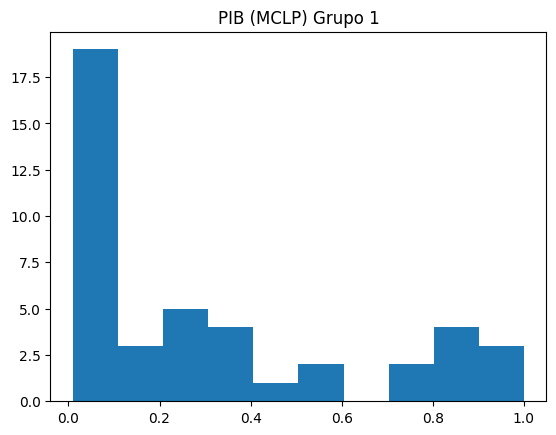

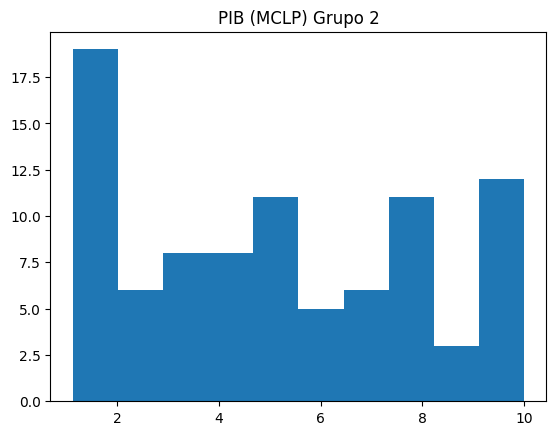

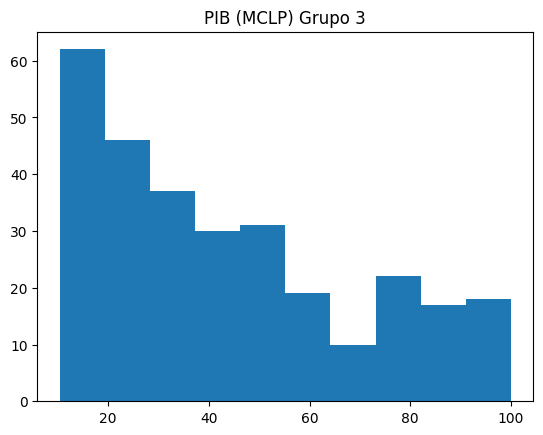

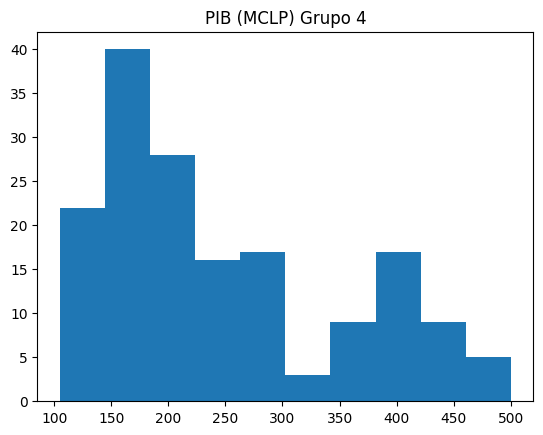

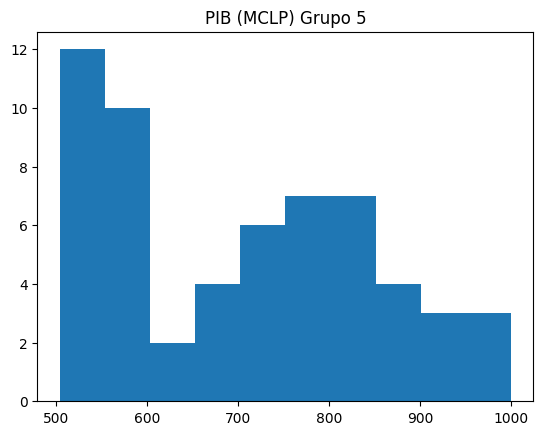

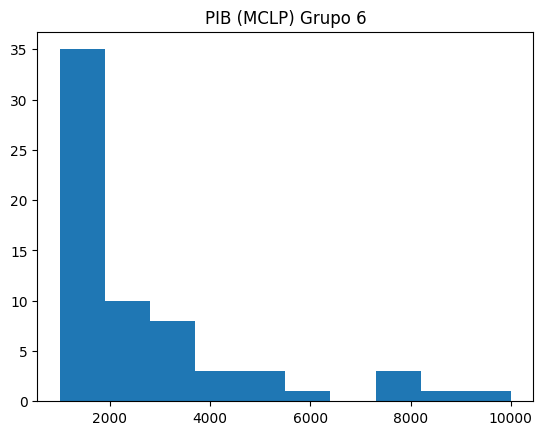

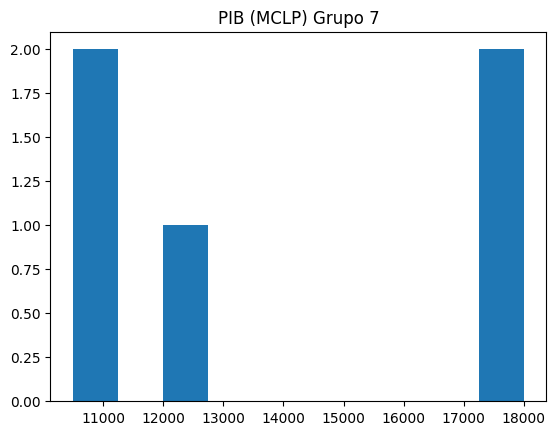

In [62]:
# Separaciones arbitrarias con fin de realizar pruebas
grupos = {}

grupos[1] = df_reduced[df_reduced["PIB (MCLP)"] <= 1]
grupos[2] = df_reduced[(df_reduced["PIB (MCLP)"] > 1) & (df_reduced["PIB (MCLP)"] <= 10)]
grupos[3] = df_reduced[(df_reduced["PIB (MCLP)"] > 10) & (df_reduced["PIB (MCLP)"] <= 100)]
grupos[4] = df_reduced[(df_reduced["PIB (MCLP)"] > 100) & (df_reduced["PIB (MCLP)"] <= 500)]
grupos[5] = df_reduced[(df_reduced["PIB (MCLP)"] > 500) & (df_reduced["PIB (MCLP)"] <= 1000)]
grupos[6] = df_reduced[(df_reduced["PIB (MCLP)"] > 1000) & (df_reduced["PIB (MCLP)"] <= 10000)]
grupos[7] = df_reduced[(df_reduced["PIB (MCLP)"] > 10000)]
for i in grupos.keys():
  plt.hist(grupos[i]["PIB (MCLP)"])
  plt.title(f"PIB (MCLP) Grupo {i}")
  plt.show()

Clusters modelo K-Means (k=4): {np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
Clusters modelo DBSCAN (eps=0.8, min_samples=100): {np.int64(0), np.int64(-1)}
Clusters modelo Agglomerative (k=4): {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}
Clusters modelo Gaussian Mixture (k=4): {np.int64(0), np.int64(1), np.int64(2), np.int64(3)}


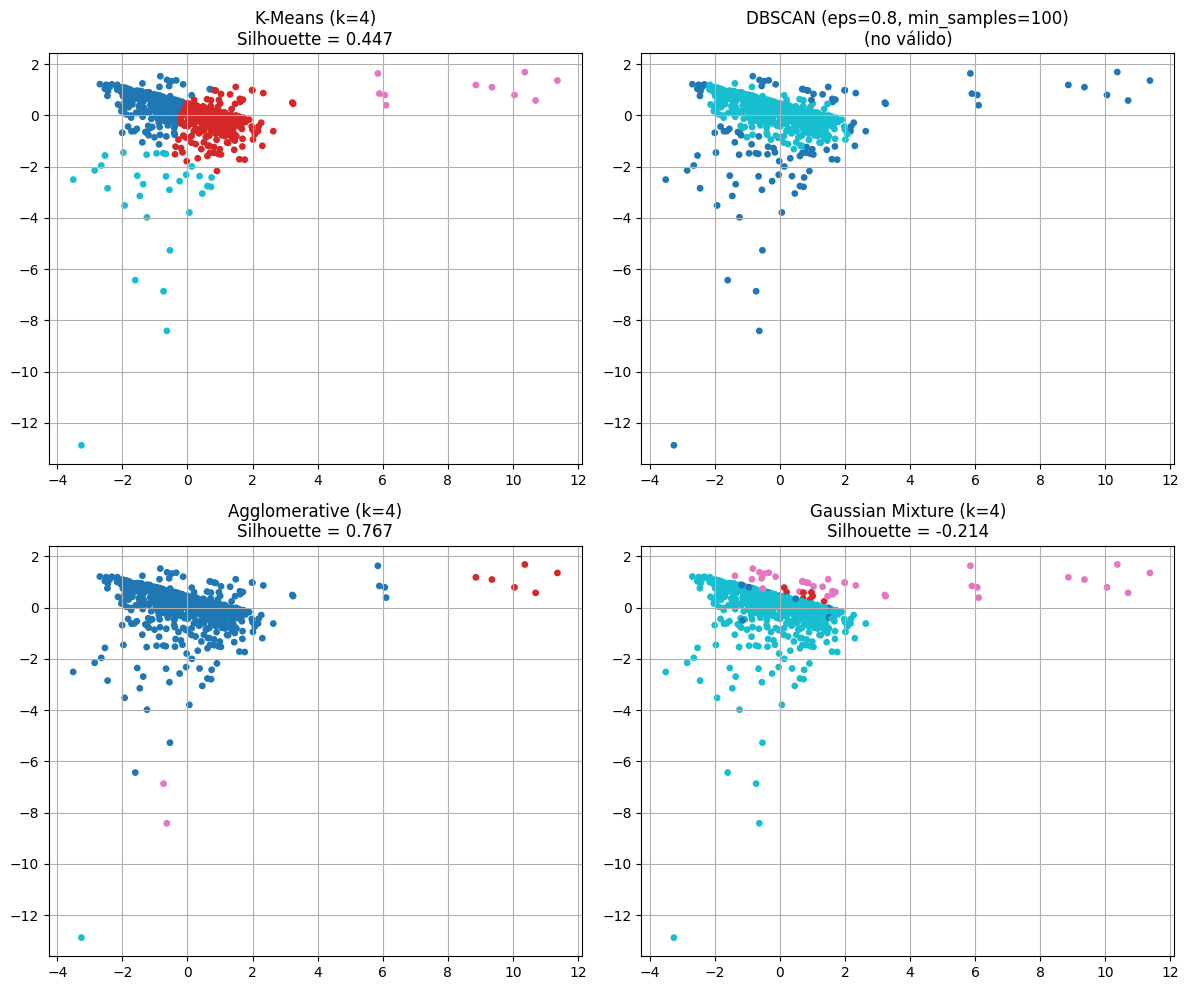


📊 Resultados comparativos:
                              Modelo  Silhouette  Calinski-Harabasz  \
0                      K-Means (k=4)       0.447            520.258   
1  DBSCAN (eps=0.8, min_samples=100)         NaN                NaN   
2                Agglomerative (k=4)       0.767            147.956   
3             Gaussian Mixture (k=4)      -0.214             52.542   

   Davies-Bouldin  
0           0.728  
1             NaN  
2           0.221  
3           2.971  


In [70]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# --- Preparación de datos ---
X = df_reduced.drop(columns=["PIB (MCLP)", "cultivo_principal"])
y = df_reduced["PIB (MCLP)"]

X = StandardScaler().fit_transform(X)

# --- Modelos a probar ---
eps = 0.8
min_samples = 100
n_clusters_kmeans = 4
n_clusters_agg = 4

models = {
    f"K-Means (k={n_clusters_kmeans})": KMeans(n_clusters=n_clusters_kmeans, random_state=42),
    f"DBSCAN (eps={eps}, min_samples={min_samples})": DBSCAN(eps=eps, min_samples=min_samples),
    f"Agglomerative (k={n_clusters_agg})": AgglomerativeClustering(n_clusters=n_clusters_agg, linkage = "average"),
    f"Gaussian Mixture (k=4)": GaussianMixture(n_components=4, random_state=42)
}

# --- Reducción de dimensionalidad (para visualizar en 2D) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- Evaluación y visualización ---
results = []

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    # Entrenamiento
    labels = model.fit_predict(X)
    print(f"Clusters modelo {name}: {set(labels)}")

    # Verificar que existan múltiples clusters válidos
    if len(set(labels)) > 1 and -1 not in labels:
        sil = silhouette_score(X, labels)
        cal = calinski_harabasz_score(X, labels)
        dav = davies_bouldin_score(X, labels)
    else:
        sil, cal, dav = np.nan, np.nan, np.nan

    results.append({
        "Modelo": name,
        "Silhouette": sil,
        "Calinski-Harabasz": cal,
        "Davies-Bouldin": dav
    })

    # Visualización en espacio PCA
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="tab10", s=15)
    axes[i].set_title(f"{name}\nSilhouette = {sil:.3f}" if not np.isnan(sil) else f"{name}\n(no válido)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# --- Resultados comparativos ---
results_df = pd.DataFrame(results)
print("\n📊 Resultados comparativos:")
print(results_df.round(3))

In [33]:
# grupos
n = 4
modelo = KMeans(n_clusters=n, random_state=42)
labels = modelo.fit_predict(X)
df_reduced["cluster"] = labels
grupos = {}
for i in range(n):
  grupos[i] = df_reduced[df_reduced["cluster"] == i]
df_reduced.head()

,z1,z2,z3,z4,cultivo_principal,PIB (MCLP),cluster
0,-48968.889665,-23.347154,132.395691,-51.320293,Tomate,2400.0,2
1,-8969.194119,17.363619,-20.089468,5.872329,Tomate,560.0,0
2,1029.346486,10.116832,-15.493178,4.946387,Tomate,1400.0,0
3,1030.848673,4.368696,-13.147236,8.280601,Cebolla,54.0,0
4,-3969.135058,9.880953,-2.352663,-0.016884,Tomate,3.0,3


### Regresión Lineal

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

def metricas(y_pred,y_test,nombre_regresor:str):
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  rmse_prom = rmse/ np.mean(y_test)
  mae_prom = mae/ np.mean(y_test)

  print(f"🔹 Resultados del modelo de {nombre_regresor}:")
  print(f"R²:  {r2:.4f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"MAE: {mae:.2f}")
  print(f"RMSE prom: {rmse_prom:.2f}")
  print(f"MAE prom: {mae_prom:.2f}")
  return r2, mse, rmse, mae

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

num_cols = ["z1", "z2", "z3", "z4"]
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), num_cols)
], remainder = "passthrough")

for key in grupos.keys():
  print(f"Grupo {key}")
  X = grupos[key].drop(columns = ["PIB (MCLP)"])
  y = grupos[key]["PIB (MCLP)"]
  y = np.log1p(y)

  for seed in range(20,21):
      X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.8,              # 80% entrenamiento / 20% prueba
        stratify=X["cultivo_principal"],  # mantiene proporciones de productos
        random_state=seed
      )
      X_train = X_train.drop(columns=["cultivo_principal"])
      X_test = X_test.drop(columns=["cultivo_principal"])

      model_linear = Pipeline([
          ("preprocess", preprocessor),
          ("regressor", LinearRegression())
      ])
      # model_poly = Pipeline([
      #         ("preprocess", preprocessor_poly),
      #         ("regressor", LinearRegression())
      # ])

      model_linear.fit(X_train, y_train)
      # model_poly.fit(X_train, y_train)

      y_pred = model_linear.predict(X_test)

      print("="*20,f"Seed {seed}","="*20)
      r2, mse, rmse, mae = metricas(y_pred,y_test,"Regresión Lineal")

      for i, item in enumerate(zip(y_pred,y_test)):
        print(f"Pred: {item[0]:.2f} | Real: {item[1]:.2f}")

Grupo 0
==================== Seed 20 ====================
🔹 Resultados del modelo de Regresión Lineal:
R²:  -0.1116
MSE: 5.04
RMSE: 2.24
MAE: 1.71
RMSE prom: 0.52
MAE prom: 0.40
Pred: 3.46 | Real: 1.34
Pred: 3.57 | Real: 4.76
Pred: 5.46 | Real: 4.62
Pred: 3.56 | Real: 7.09
Pred: 4.75 | Real: 5.94
Pred: 4.81 | Real: 5.38
Pred: 3.74 | Real: 0.47
Pred: 3.25 | Real: 2.14
Pred: 4.56 | Real: 0.56
Pred: 8.18 | Real: 7.08
Pred: 3.82 | Real: 3.04
Pred: 3.87 | Real: 2.40
Pred: 4.73 | Real: 0.59
Pred: 4.13 | Real: 4.56
Pred: 4.39 | Real: 5.97
Pred: 4.54 | Real: 7.13
Pred: 3.88 | Real: 3.93
Pred: 4.09 | Real: 7.86
Pred: 7.25 | Real: 3.81
Pred: 2.73 | Real: 4.07
Pred: 5.18 | Real: 4.36
Pred: 4.55 | Real: 2.20
Pred: 4.87 | Real: 5.95
Pred: 3.82 | Real: 3.93
Pred: 4.50 | Real: 6.55
Pred: 5.56 | Real: 6.69
Pred: 3.86 | Real: 4.40
Pred: 4.14 | Real: 5.53
Pred: 4.36 | Real: 3.28
Pred: 4.99 | Real: 4.39
Pred: 3.93 | Real: 6.40
Pred: 4.90 | Real: 5.02
Pred: 3.94 | Real: 3.83
Pred: 4.63 | Real: 4.57
Pred: 

In [38]:
# Ridge
for seed in range(20,30):
    X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size=0.8,              # 80% entrenamiento / 20% prueba
      stratify=X["cultivo_principal"],  # mantiene proporciones de productos
      random_state=seed
    )
    X_train = X_train.drop(columns=["cultivo_principal"])
    X_test = X_test.drop(columns=["cultivo_principal"])

    model_ridge = Pipeline([
        ("preprocess", preprocessor),
        # ("feature_selection", SelectKBest(f_regression, k=30)),
        ("regressor", RidgeCV(alphas =np.logspace(-3, 3, 50), cv=5))
    ])

    model_ridge.fit(X_train, y_train)

    y_pred = model_ridge.predict(X_test)
    print("="*20,f"Seed {seed}","="*20)
    r2, mse, rmse, mae = metricas(y_pred,y_test,"Regresión Ridge")

==================== Seed 20 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  0.0395
MSE: 3.32
RMSE: 1.82
MAE: 1.45
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 21 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  -0.0062
MSE: 3.59
RMSE: 1.89
MAE: 1.49
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 22 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  -0.0160
MSE: 3.50
RMSE: 1.87
MAE: 1.50
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 23 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  0.0429
MSE: 3.34
RMSE: 1.83
MAE: 1.45
RMSE prom: 0.43
MAE prom: 0.34
==================== Seed 24 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  -0.0149
MSE: 3.75
RMSE: 1.94
MAE: 1.52
RMSE prom: 0.46
MAE prom: 0.36
==================== Seed 25 ====================
🔹 Resultados del modelo de Regresión Ridge:
R²:  -0.0309
MSE: 3.76
RMSE: 1.94
MAE: 1.53
RMSE prom: 0.46
MAE

In [39]:
# Lasso
for seed in range(20,30):
    X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size=0.8,              # 80% entrenamiento / 20% prueba
      stratify=X["cultivo_principal"],  # mantiene proporciones de productos
      random_state=seed
    )
    X_train = X_train.drop(columns=["cultivo_principal"])
    X_test = X_test.drop(columns=["cultivo_principal"])

    model_lasso = Pipeline([
        ("preprocess", preprocessor),
        ("regressor", LassoCV(alphas = np.logspace(-3, 3, 50), cv=5))
    ])

    model_lasso.fit(X_train, y_train)

    y_pred = model_lasso.predict(X_test)

    print("="*20,f"Seed {seed}","="*20)
    r2, mse, rmse, mae = metricas(y_pred,y_test,"Regresión Lasso")

==================== Seed 20 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  0.0412
MSE: 3.32
RMSE: 1.82
MAE: 1.45
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 21 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  -0.0219
MSE: 3.65
RMSE: 1.91
MAE: 1.52
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 22 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  -0.0164
MSE: 3.50
RMSE: 1.87
MAE: 1.50
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 23 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  0.0383
MSE: 3.35
RMSE: 1.83
MAE: 1.45
RMSE prom: 0.43
MAE prom: 0.34
==================== Seed 24 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  -0.0216
MSE: 3.78
RMSE: 1.94
MAE: 1.53
RMSE prom: 0.46
MAE prom: 0.36
==================== Seed 25 ====================
🔹 Resultados del modelo de Regresión Lasso:
R²:  -0.0311
MSE: 3.76
RMSE: 1.94
MAE: 1.53
RMSE prom: 0.46
MAE

In [40]:
# ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid_elastic = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}


for seed in range(20,30):
    X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      test_size=0.8,              # 80% entrenamiento / 20% prueba
      stratify=X["cultivo_principal"],  # mantiene proporciones de productos
      random_state=seed
    )
    X_train = X_train.drop(columns=["cultivo_principal"])
    X_test = X_test.drop(columns=["cultivo_principal"])

    model_elastic = Pipeline([
        ("preprocess", preprocessor),
        ("regressor", ElasticNet(
            max_iter=10000,
        ))
    ])

    grid_search = GridSearchCV(
        model_elastic,
        param_grid_elastic,
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    print("="*20,f"Seed {seed}","="*20)
    r2, mse, rmse, mae = metricas(y_pred,y_test,"Regresión ElasticNet")

==================== Seed 20 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  0.0057
MSE: 3.44
RMSE: 1.85
MAE: 1.48
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 21 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  -0.0178
MSE: 3.63
RMSE: 1.91
MAE: 1.50
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 22 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  -0.0164
MSE: 3.50
RMSE: 1.87
MAE: 1.50
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 23 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  0.0341
MSE: 3.37
RMSE: 1.84
MAE: 1.46
RMSE prom: 0.43
MAE prom: 0.35
==================== Seed 24 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  0.0524
MSE: 3.50
RMSE: 1.87
MAE: 1.48
RMSE prom: 0.45
MAE prom: 0.35
==================== Seed 25 ====================
🔹 Resultados del modelo de Regresión ElasticNet:
R²:  -0.0311
MSE: 3.76
RMSE: 1.94


### SVR Lineal

In [41]:
# SVR Linear
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
num_cols = ["z1", "z2", "z3", "z4"]
i = 3
X = grupos[i].drop(columns = ["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]
y = np.log1p(y)

pipeline_svr = Pipeline([
    ("preprocess", ColumnTransformer([
        ("num", StandardScaler(), num_cols)
    ],)),
    # ("feature_selection", SelectKBest(f_regression, k=10)),
    ("regressor", SVR(kernel="linear"))
])

param_grid = {
    "regressor__C": [0.01, 0.1, 1, 10, 100],
    "regressor__epsilon": [0.001, 0.01, 0.1, 1]
}

for seed in range(20,30):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])

  grid_search = GridSearchCV(
    pipeline_svr,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
  )

  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)

  print("="*20,f"Seed {seed}","="*20)
  r2, mse, rmse, mae = metricas(y_pred,y_test,"SVR Lineal")

==================== Seed 20 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  0.0352
MSE: 3.34
RMSE: 1.83
MAE: 1.46
RMSE prom: 0.44
MAE prom: 0.35
==================== Seed 21 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  0.0186
MSE: 3.50
RMSE: 1.87
MAE: 1.48
RMSE prom: 0.44
MAE prom: 0.34
==================== Seed 22 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  0.0518
MSE: 3.27
RMSE: 1.81
MAE: 1.44
RMSE prom: 0.42
MAE prom: 0.33
==================== Seed 23 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  0.0478
MSE: 3.32
RMSE: 1.82
MAE: 1.44
RMSE prom: 0.43
MAE prom: 0.34
==================== Seed 24 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  -0.0203
MSE: 3.77
RMSE: 1.94
MAE: 1.52
RMSE prom: 0.46
MAE prom: 0.36
==================== Seed 25 ====================
🔹 Resultados del modelo de SVR Lineal:
R²:  -0.0230
MSE: 3.73
RMSE: 1.93
MAE: 1.53
RMSE prom: 0.46
MAE prom: 0.37
====================

In [42]:
# SVR RBF
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

num_cols = ["z1", "z2", "z3", "z4"]
i = 3
X = grupos[i]
y = grupos[i]["PIB (MCLP)"]

pipeline_svr = Pipeline([
    ("preprocess", ColumnTransformer([
        ("num", StandardScaler(), num_cols)
    ])),
    # ("feature_selection", SelectKBest(f_regression, k=10)),
    ("regressor", SVR(kernel="rbf"))
])

param_grid = {
    "regressor__C": [0.01, 0.1, 1, 10, 100],
    "regressor__epsilon": [0.001, 0.01, 0.1, 1]
}


for seed in range(20,30):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])

  grid_search = GridSearchCV(
    pipeline_svr,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
  )

  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)

  print("="*20,f"Seed {seed}","="*20)
  r2, mse, rmse, mae = metricas(y_pred,y_test,"SVR RBF")

==================== Seed 20 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0465
MSE: 1463017.86
RMSE: 1209.55
MAE: 338.34
RMSE prom: 3.35
MAE prom: 0.94
==================== Seed 21 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0538
MSE: 2791248.35
RMSE: 1670.70
MAE: 419.31
RMSE prom: 3.76
MAE prom: 0.94
==================== Seed 22 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0663
MSE: 1542326.20
RMSE: 1241.90
MAE: 357.81
RMSE prom: 3.18
MAE prom: 0.92
==================== Seed 23 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0507
MSE: 2637650.68
RMSE: 1624.08
MAE: 385.32
RMSE prom: 3.98
MAE prom: 0.94
==================== Seed 24 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0582
MSE: 1525898.00
RMSE: 1235.27
MAE: 358.25
RMSE prom: 3.23
MAE prom: 0.94
==================== Seed 25 ====================
🔹 Resultados del modelo de SVR RBF:
R²:  -0.0311
MSE: 2923658.53
RMSE: 1709.87
MAE: 440.31

### Multilayer Perceptron Neural Network (MLP)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# -----------------------------
# 2️⃣ Definir clase del modelo
# -----------------------------
class RegressionNN(nn.Module):
    def __init__(self, input_dim, hidden_layers, hidden_units):
        super().__init__()
        layers = []
        last_dim = input_dim

        for _ in range(hidden_layers):
            layers.append(nn.Linear(last_dim, hidden_units))
            layers.append(nn.ReLU())
            last_dim = hidden_units

        layers.append(nn.Linear(last_dim, 1))  # salida de 1 valor para regresión
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# -----------------------------
# 3️⃣ Función de entrenamiento
# -----------------------------
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, lr=1e-3, patience=10, show_progress=False):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    best_val_loss = np.inf
    patience_counter = 0

    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        # Validación
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val).item()

        if show_progress:
          print(f"Época {epoch+1}/{epochs} - Train Loss: {loss.item():.4f} - Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                if show_progress:
                  print("🛑 Early stopping activado")
                break

    model.load_state_dict(best_model_state)
    return model, best_val_loss

# -----------------------------
# 4️⃣ Búsqueda de hiperparámetros
# -----------------------------

mlp_param = {
    "hidden layers": [1, 2, 3],
    "hidden units": [16, 32, 64]
}


def MLP_NN(X_train, y_train, param, epochs=100, lr=1e-3, patience=10, show_progress=False):

    best_config = None
    best_loss = np.inf

    # ---- Detectar columnas binarias / numéricas ----
    # bin_cols = [c for c in X_train.columns if sorted(X_train[c].unique()) == [0,1]]
    # num_cols = [c for c in X_train.columns if c not in bin_cols]
    num_cols = get_non_binary_columns(X_train)

    # ---- Escaladores ----
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    y_train_np = y_train.to_numpy().reshape(-1, 1)

    # ---- Escalar solo numéricas ----
    X_scaled = X_train.copy()
    X_scaled[num_cols] = scaler_X.fit_transform(X_scaled[num_cols])
    y_scaled = scaler_y.fit_transform(y_train_np)

    # ---- Train/Validation split ----
    X_tr, X_val, y_tr, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    # ---- Tensores ----
    X_tr = torch.tensor(X_tr.to_numpy(), dtype=torch.float32)
    y_tr = torch.tensor(y_tr, dtype=torch.float32)
    X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)

    # ---- Grid Search ----
    for layers in param['hidden layers']:
        for units in param['hidden units']:

            model = RegressionNN(input_dim=X_tr.shape[1], hidden_layers=layers, hidden_units=units)

            trained_model, val_loss = train_model(
                model, X_tr, y_tr, X_val, y_val,
                epochs=epochs, lr=lr, patience=patience
            )

            if val_loss < best_loss:
                best_loss = val_loss
                best_config = (layers, units)
                best_model = trained_model

    return best_model, scaler_X, scaler_y, num_cols



In [45]:
mlp_param = {
    "hidden layers": [1, 2, 3],
    "hidden units": [16, 32, 64]
}

i = 3
X = grupos[i].drop(columns = ["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]


for seed in range(20, 30):

    # ---- Train/Test split ----
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.8,
        stratify=X["cultivo_principal"],
        random_state=seed
    )

    X_train = X_train.drop(columns=["cultivo_principal"])
    X_test = X_test.drop(columns=["cultivo_principal"])

    # ---- Entrenar modelo ----
    model_mlp, scaler_X, scaler_y, num_cols = MLP_NN(X_train, y_train, mlp_param, epochs=100, lr=1e-3, patience=10)

    # ---- Escalar solo numéricas del test ----
    X_test_scaled = X_test.copy()
    X_test_scaled[num_cols] = scaler_X.transform(X_test[num_cols])

    X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)

    # ---- Predicción ----
    model_mlp.eval()
    with torch.no_grad():
        y_pred_scaled = model_mlp(X_test_tensor).numpy()

    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = y_test.to_numpy().reshape(-1, 1)

    # ---- Métricas ----
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"🔹 MLP (seed={seed}) → R2: {r2:.4f} | MSE: {mse:.4f} | MAE: {mae:.4f}")



🔹 MLP (seed=20) → R2: -0.6854 | MSE: 2356141.0121 | MAE: 1185.3975
🔹 MLP (seed=21) → R2: -0.0391 | MSE: 2752465.0180 | MAE: 512.2198
🔹 MLP (seed=22) → R2: -0.0630 | MSE: 1537424.9842 | MAE: 538.9175
🔹 MLP (seed=23) → R2: -0.0062 | MSE: 2526040.7981 | MAE: 568.0127
🔹 MLP (seed=24) → R2: -0.1018 | MSE: 1588817.6716 | MAE: 496.0089
🔹 MLP (seed=25) → R2: -0.0139 | MSE: 2875030.2915 | MAE: 490.5527
🔹 MLP (seed=26) → R2: -0.0076 | MSE: 2433704.8681 | MAE: 449.2853
🔹 MLP (seed=27) → R2: -0.0210 | MSE: 2897161.1309 | MAE: 471.8281
🔹 MLP (seed=28) → R2: -0.0146 | MSE: 2740934.4893 | MAE: 472.7226
🔹 MLP (seed=29) → R2: -0.0249 | MSE: 1423580.0058 | MAE: 569.1177


### XGBoost


In [47]:
import xgboost as xgb

i = 3
X = grupos[i].drop(columns = ["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]
y = np.log1p(y)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

for seed in range(20,30):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])

  model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror')

  grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # MSE para regresión
    cv=3,
    verbose=2,
    n_jobs=-1
  )
  grid_search.fit(X_train, y_train)

  best_xgb = grid_search.best_estimator_
  best_xgb.fit(X_train, y_train)

  y_pred = best_xgb.predict(X_test)

  print("="*20,f"Seed {seed}","="*20)
  r2, mse, rmse, mae = metricas(y_pred,y_test,"XGBoost")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
==================== Seed 20 ====================
🔹 Resultados del modelo de XGBoost:
R²:  -0.0949
MSE: 3.79
RMSE: 1.95
MAE: 1.57
RMSE prom: 0.47
MAE prom: 0.38
Fitting 3 folds for each of 27 candidates, totalling 81 fits
==================== Seed 21 ====================
🔹 Resultados del modelo de XGBoost:
R²:  -0.0686
MSE: 3.81
RMSE: 1.95
MAE: 1.52
RMSE prom: 0.45
MAE prom: 0.35
Fitting 3 folds for each of 27 candidates, totalling 81 fits
==================== Seed 22 ====================
🔹 Resultados del modelo de XGBoost:
R²:  -0.2435
MSE: 4.29
RMSE: 2.07
MAE: 1.60
RMSE prom: 0.48
MAE prom: 0.37
Fitting 3 folds for each of 27 candidates, totalling 81 fits
==================== Seed 23 ====================
🔹 Resultados del modelo de XGBoost:
R²:  -0.1059
MSE: 3.86
RMSE: 1.96
MAE: 1.53
RMSE prom: 0.46
MAE prom: 0.36
Fitting 3 folds for each of 27 candidates, totalling 81 fits
==================== Seed 24 ====================
🔹

### KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

num_cols = ["z1", "z2", "z3", "z4"]
i = 3
X = grupos[i].drop(columns = ["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]
y = np.log1p(y)

param_grid = {
    "regressor__n_neighbors": [3, 5, 7],
    "regressor__weights": ["uniform", "distance"],
    "regressor__p": [1, 2]  # distancia Manhattan o Euclidiana
}

preprocess_knn = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)

for seed in range(20, 30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.8,
        stratify=X["cultivo_principal"],
        random_state=seed
    )
    X_train = X_train.drop(columns=["cultivo_principal"])
    X_test = X_test.drop(columns=["cultivo_principal"])

    model_knn = Pipeline([
        ("preprocess", preprocess_knn),
        ("regressor", KNeighborsRegressor())
    ])
    grid_search = GridSearchCV(
        model_knn,
        param_grid,
        cv=5,
        scoring="r2",
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    print("=" * 20, f"Seed {seed}", "=" * 20)
    r2, mse, rmse, mae = metricas(y_pred, y_test, "KNN")
    # for i, item in enumerate(zip(y_pred, y_test)):
    #   print(f"Predicho: {item[0]:.2f}, Real: {item[1]:.2f}")


==================== Seed 20 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.2239
MSE: 834581.37
RMSE: 913.55
MAE: 460.20
RMSE prom: 2.74
MAE prom: 1.38
==================== Seed 21 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.2981
MSE: 613696.54
RMSE: 783.39
MAE: 396.45
RMSE prom: 2.45
MAE prom: 1.24
==================== Seed 22 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.3908
MSE: 921001.67
RMSE: 959.69
MAE: 551.94
RMSE prom: 3.00
MAE prom: 1.72
==================== Seed 23 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.0096
MSE: 909055.26
RMSE: 953.44
MAE: 374.94
RMSE prom: 2.66
MAE prom: 1.05
==================== Seed 24 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.0081
MSE: 925067.68
RMSE: 961.80
MAE: 400.88
RMSE prom: 2.63
MAE prom: 1.10
==================== Seed 25 ====================
🔹 Resultados del modelo de KNN:
R²:  -0.0101
MSE: 934069.37
RMSE: 966.47
MAE: 383.63
RMSE prom: 2.63
MAE prom: 1.04
====

### SVR DRO


In [45]:
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold,  KFold
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def svr_dro(param,data):
  """
  Este código resuelve el problema de optimización de Support Vector Regressor
  propuesto por  Shafieezadeh-Abadeh et al. en su paper Regularization via
  Mass Transportation (2018). El link adjunto lleva al código original creado para
  problemas de clasificación, el cual se ocupó de base para plantear el modelo
  de regresión.

  Link: https://github.com/sorooshafiee/Regularization-via-Transportation/blob/master/dro_model.py
  """
  x_train = data['x']
  y_train = data['y'].flatten()

  all_rho = list(param['rho'])
  all_rho.sort(reverse=True)
  all_epsilon = list(param['epsilon'])
  all_epsilon.sort(reverse=True)
  pnorm = param['pnorm']

  row, col = x_train.shape
  optimal = {}

  # Crear modelo
  model = grb.Model("DRSVR")
  model.setParam("OutputFlag", 0)

  # Definir variables de decisión
  var_lambda = model.addVar(vtype=grb.GRB.CONTINUOUS)
  var_b = model.addVar(vtype=grb.GRB.CONTINUOUS,lb = -grb.GRB.INFINITY)
  var_s = {}
  var_w = {}
  slack_var = {}
  for i in range(row):
    var_s[i] = model.addVar(vtype=grb.GRB.CONTINUOUS, lb = 0)
  for j in range(col):
    var_w[j] = model.addVar(vtype=grb.GRB.CONTINUOUS, lb=-grb.GRB.INFINITY)
    if pnorm == 1:
      slack_var[j] = model.addVar(vtype=grb.GRB.CONTINUOUS, lb=0)

  # Integrar variables al modelo
  model.update()

  # Definir restricciones
  chg_cons = {}
  for i in range(row):
    chg_cons[(i,0)] = model.addConstr(
        y_train[i] - grb.quicksum(var_w[j] * x_train[i,j] for j in range(col))
        - var_b - var_s[i] <= all_epsilon[0]
    )
    chg_cons[(i,1)] = model.addConstr(
      - y_train[i] + grb.quicksum(var_w[j] * x_train[i,j] for j in range(col))
      + var_b - var_s[i] <= all_epsilon[0]
    )
    model.addConstr(
        grb.quicksum(var_w[j] * x_train[i,j] for j in range(col)) + var_b >= 0
    )

  if pnorm == 1:
    for j in range(col):
      model.addConstr(var_w[j] <= slack_var[j])
      model.addConstr(-var_w[j] <= slack_var[j])
    model.addConstr(grb.quicksum(slack_var[j]
                                  for j in range(col)) <= var_lambda)
  elif pnorm == 2:
    model.addQConstr(
      grb.quicksum(var_w[j] * var_w[j]
                    for j in range(col)) <= var_lambda * var_lambda)

  elif pnorm == float('Inf'):
    for j in range(col):
      model.addConstr(var_w[j] <= var_lambda)
      model.addConstr(-var_w[j] <= var_lambda)

  # Definir función objetivo
  sum_var_s = grb.quicksum(var_s[i] for i in range(row))
  for index, epsilon in enumerate(all_epsilon):
    # El modelo se actualiza para diferente valores de epsilon
    if index > 0:
      for i in range(row):
        chg_cons[(i,0)].setAttr(grb.GRB.Attr.RHS, epsilon)
        chg_cons[(i,1)].setAttr(grb.GRB.Attr.RHS, epsilon)
    for rho in all_rho:
      obj = var_lambda * rho + (1 / row) * sum_var_s
      model.setObjective(obj, grb.GRB.MINIMIZE)

      # Optimizar
      model.optimize()

      # Guardar resultados
      w_opt = np.array([var_w[j].x for j in range(col)])
      b_opt = var_b.x

      tmp = {
          (epsilon, rho): {
              "w": w_opt,
              "b": b_opt,
              "objective": model.ObjVal,
              "diagnosis": model.status
          }
      }
      optimal.update(tmp)

  return optimal

def ksvr_dro(param,data):
  kernel_train = data['K']
  y_train = data['y'].flatten()

  all_rho = list(param['rho'])
  all_rho.sort(reverse=True)
  all_epsilon = list(param['epsilon'])
  all_epsilon.sort(reverse=True)
  if 0 in all_rho:
    all_rho.remove(0)

  row, col = kernel_train.shape
  optimal = {}

  # Crear modelo
  model = grb.Model("KDRSVR")
  model.setParam("OutputFlag", 0)

  # Definir variables de decisión
  var_lambda = model.addVar(vtype=grb.GRB.CONTINUOUS)
  var_s = {}
  var_alpha = {}
  for i in range(row):
    var_s[i] = model.addVar(vtype=grb.GRB.CONTINUOUS, lb = 0)
    var_alpha[i] = model.addVar(vtype=grb.GRB.CONTINUOUS, lb = -grb.GRB.INFINITY)

  # Integrar variables al modelo
  model.update()

  # Definir restricciones
  chg_cons = {}
  for i in range(row):
    chg_cons[(i,0)] = model.addConstr(
        - y_train[i] + grb.quicksum(kernel_train[j,i] * var_alpha[j] for j in range(col))
        - var_s[i] <= all_epsilon[0]
    )
    chg_cons[(i,1)] = model.addConstr(
      y_train[i] - grb.quicksum(kernel_train[j,i] * var_alpha[j] for j in range(col))
      - var_s[i] <= all_epsilon[0]
    )
    model.addConstr(
        grb.quicksum(kernel_train[j,i] * var_alpha[j] for j in range(row)) >= 0
    )
  model.addQConstr(
      grb.quicksum(var_alpha[k1] * kernel_train[k1, k2] * var_alpha[k2]
                    for k1 in range(row)
                    for k2 in range(row)) <= var_lambda * var_lambda)

  # Definir función objetivo
  sum_var_s = grb.quicksum(var_s[i] for i in range(row))
  for index, epsilon in enumerate(all_epsilon):
    # El modelo se actualiza para diferente valores de epsilon
    if index > 0:
      for i in range(row):
        chg_cons[(i,0)].setAttr(grb.GRB.Attr.RHS, epsilon)
        chg_cons[(i,1)].setAttr(grb.GRB.Attr.RHS, epsilon)
    for rho in all_rho:
      obj = var_lambda * rho + (1 / row) * sum_var_s
      model.setObjective(obj, grb.GRB.MINIMIZE)

      # Optimizar
      model.optimize()

      # Guardar resultados
      alpha_opt = np.array([var_alpha[j].x for j in range(row)])
      tmp = {
          (epsilon, rho): {
              "alpha": alpha_opt,
              "objective": model.ObjVal,
              "diagnosis": model.status
          }
      }
      optimal.update(tmp)
  return optimal

def validation_process_svr(X_train, y_train, params):
    total_score = defaultdict(list)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X_train):
        X_train_k = X_train[train_index, :]
        X_val_k   = X_train[val_index, :]
        y_train_k = y_train[train_index]
        y_val_k   = y_train[val_index]

        data_k = {
            'x': X_train_k,
            'y': y_train_k
        }
        optimal = svr_dro(params, data_k)
        for key, value in optimal.items():
          w_opt = value['w']
          b_opt = value['b']
          y_pred = X_val_k.dot(w_opt)+b_opt
          total_score[key].append(mean_squared_error(y_val_k, y_pred))


    return total_score

def validation_process_ksvr(kernel_train, y_train, params):
    total_score = defaultdict(list)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(kernel_train):
      ker_train_k = kernel_train[train_index, :][:, train_index]
      ker_val_k = kernel_train[val_index, :][:, train_index]
      y_train_k = y_train[train_index]
      y_val_k = y_train[val_index]

      data_k = {
          'K': ker_train_k,
          'y': y_train_k
      }

      optimal = ksvr_dro(params, data_k)
      for key, value in optimal.items():
        alpha_opt = value['alpha']
        y_pred = ker_val_k.dot(alpha_opt)
        total_score[key].append(mean_squared_error(y_val_k, y_pred))

    return total_score

def SVR_DRO(params, data,kernel='linear'):
    """
    Realiza validación cruzada para buscar el mejor epsilon
    y luego entrena el modelo final con todo el conjunto de entrenamiento.
    """
    if kernel == 'linear':
      total_score = validation_process_svr(data['x'], data['y'], params)
    elif kernel == 'rbf':
      total_score = validation_process_ksvr(data['K'], data['y'], params)
    tot_score = pd.DataFrame(total_score)
    ave_score = tot_score.mean()

    # Seleccionamos el mejor epsilon (mayor R²)
    best_epsilon, best_rho = ave_score.idxmax()
    best_param = {
        'epsilon': np.array([best_epsilon]),
        'rho': np.array([best_rho]),
        'pnorm': params["pnorm"]
    }
    if kernel == 'linear':
      optimal = svr_dro(best_param, data)
      w_opt = optimal[(best_epsilon, best_rho)]["w"]
      b_opt = optimal[(best_epsilon, best_rho)]["b"]

      model = (w_opt, b_opt)
    elif kernel == 'rbf':
      optimal = ksvr_dro(best_param, data)
      alpha_opt = optimal[(best_epsilon, best_rho)]["alpha"]
      model = alpha_opt
    return model

def gamma_scale(X):
  """
  Calcula gamma='scale' según sklearn:
    gamma = 1 / (n_features * Var(X))
  Si 'scaled' es True, X se asume ya escalado (o lo escalas dentro).
  """
  n_features = X.shape[1]
  var_mean = np.var(X, axis=0).mean()   # ddof=0
  return 1.0 / (n_features * var_mean)

In [58]:
# Pruebas DRSVR Lineal
param = {
    'rho': [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "epsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}
num_cols = ["z1", "z2", "z3", "z4"]

i = 1
X = grupos[i].drop(columns=["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)



for seed in range(20,21):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])
  X_train_scaled = preprocess_drsvr.fit_transform(X_train)
  X_test_scaled = preprocess_drsvr.transform(X_test)
  data = {'x': X_train_scaled, 'y': y_train.to_numpy()}
  w,b = SVR_DRO(param, data)

  y_pred = X_test_scaled.dot(w)+b

  r2, mse, rmse, mae = metricas(y_pred,y_test,"DRSVR Lineal")
  for i, item in enumerate(zip(y_pred, y_test)):
    print(f"Predicho: {item[0]:.2f}, Real: {item[1]:.2f}")


🔹 Resultados del modelo de DRSVR Lineal:
R²:  -0.0888
MSE: 8660753.86
RMSE: 2942.92
MAE: 871.56
RMSE prom: 3.30
MAE prom: 0.98
Predicho: 51.45, Real: 1800.00
Predicho: 51.45, Real: 693.60
Predicho: 51.45, Real: 50.00
Predicho: 51.45, Real: 200.00
Predicho: 51.45, Real: 1.28
Predicho: 51.45, Real: 62.50
Predicho: 51.45, Real: 36.00
Predicho: 51.45, Real: 4.80
Predicho: 51.45, Real: 18000.00
Predicho: 51.45, Real: 240.00
Predicho: 51.45, Real: 105.00
Predicho: 51.45, Real: 360.00
Predicho: 51.45, Real: 35.00
Predicho: 51.45, Real: 234.60
Predicho: 51.45, Real: 51.00
Predicho: 51.45, Real: 1.00
Predicho: 51.45, Real: 1440.00
Predicho: 51.45, Real: 182.00
Predicho: 51.45, Real: 84.00
Predicho: 51.45, Real: 9.80
Predicho: 51.45, Real: 100.00
Predicho: 51.45, Real: 52.00
Predicho: 51.45, Real: 42.00
Predicho: 51.45, Real: 13.50
Predicho: 51.45, Real: 22.00
Predicho: 51.45, Real: 660.00
Predicho: 51.45, Real: 158.12
Predicho: 51.45, Real: 15.00
Predicho: 51.45, Real: 32.40
Predicho: 51.45, Re

In [47]:
# Pruebas SVR RBF
from sklearn.metrics.pairwise import rbf_kernel

param = {
    "rho": [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "epsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}

num_cols = ["z1", "z2", "z3", "z4"]

i = 0
X = grupos[i].drop(columns=["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)



for seed in range(20,30):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])

  X_train_scaled = preprocess_drsvr.fit_transform(X_train)
  X_test_scaled = preprocess_drsvr.transform(X_test)

  gamma = gamma_scale(X_train_scaled)
  kernel_train = rbf_kernel(X_train_scaled, gamma=gamma)
  kernel_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=gamma)

  data = {'K': kernel_train, 'y': y_train.to_numpy()}
  alpha = SVR_DRO(param, data,kernel='rbf')
  y_pred = kernel_test.dot(alpha)
  r2, mse, rmse, mae = metricas(y_pred,y_test,"DRSVR RBF")

🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.2076
MSE: 823454.91
RMSE: 907.44
MAE: 473.96
RMSE prom: 2.72
MAE prom: 1.42
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.9086
MSE: 902327.21
RMSE: 949.91
MAE: 433.47
RMSE prom: 2.97
MAE prom: 1.36
🔹 Resultados del modelo de DRSVR RBF:
R²:  -4.3265
MSE: 3527193.04
RMSE: 1878.08
MAE: 1059.13
RMSE prom: 5.87
MAE prom: 3.31
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.4619
MSE: 1316295.79
RMSE: 1147.30
MAE: 557.15
RMSE prom: 3.21
MAE prom: 1.56
🔹 Resultados del modelo de DRSVR RBF:
R²:  0.0306
MSE: 889573.86
RMSE: 943.17
MAE: 430.52
RMSE prom: 2.58
MAE prom: 1.18
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.0859
MSE: 1004168.25
RMSE: 1002.08
MAE: 433.94
RMSE prom: 2.72
MAE prom: 1.18
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.2105
MSE: 1117929.43
RMSE: 1057.32
MAE: 413.93
RMSE prom: 2.84
MAE prom: 1.11
🔹 Resultados del modelo de DRSVR RBF:
R²:  -1.8917
MSE: 1373871.20
RMSE: 1172.12
MAE: 514.56
RMSE prom: 3.78
MAE prom: 1.66
🔹 Resultados d

In [49]:
# Pruebas SVR RBF
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, sigmoid_kernel

param = {
    "rho": [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "epsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}

num_cols = ["z1", "z2", "z3", "z4"]

i = 0
X = grupos[i].drop(columns=["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)

for seed in range(20,30):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.8,
    stratify=X["cultivo_principal"],
    random_state=seed
  )
  X_train = X_train.drop(columns=["cultivo_principal"])
  X_test = X_test.drop(columns=["cultivo_principal"])

  X_train_scaled = preprocess_drsvr.fit_transform(X_train)
  X_test_scaled = preprocess_drsvr.transform(X_test)

  gamma = gamma_scale(X_train_scaled)
  kernel_train = rbf_kernel(X_train_scaled, gamma=gamma)
  kernel_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=gamma)

  data = {'K': kernel_train, 'y': y_train.to_numpy()}
  alpha = SVR_DRO(param, data,kernel='rbf')

  y_pred = kernel_test.dot(alpha)
  r2, mse, rmse, mae = metricas(y_pred,y_test,"DRSVR RBF")

🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.2076
MSE: 823454.91
RMSE: 907.44
MAE: 473.96
RMSE prom: 2.72
MAE prom: 1.42
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.9086
MSE: 902327.21
RMSE: 949.91
MAE: 433.47
RMSE prom: 2.97
MAE prom: 1.36
🔹 Resultados del modelo de DRSVR RBF:
R²:  -4.3265
MSE: 3527193.04
RMSE: 1878.08
MAE: 1059.13
RMSE prom: 5.87
MAE prom: 3.31
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.4619
MSE: 1316295.79
RMSE: 1147.30
MAE: 557.15
RMSE prom: 3.21
MAE prom: 1.56
🔹 Resultados del modelo de DRSVR RBF:
R²:  0.0306
MSE: 889573.86
RMSE: 943.17
MAE: 430.52
RMSE prom: 2.58
MAE prom: 1.18
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.0859
MSE: 1004168.25
RMSE: 1002.08
MAE: 433.94
RMSE prom: 2.72
MAE prom: 1.18
🔹 Resultados del modelo de DRSVR RBF:
R²:  -0.2105
MSE: 1117929.43
RMSE: 1057.32
MAE: 413.93
RMSE prom: 2.84
MAE prom: 1.11
🔹 Resultados del modelo de DRSVR RBF:
R²:  -1.8917
MSE: 1373871.20
RMSE: 1172.12
MAE: 514.56
RMSE prom: 3.78
MAE prom: 1.66
🔹 Resultados d

### Experimento

In [ ]:
def get_pipeline_svr(num_cols,kernel:str="linear"):
  pipeline_svr = Pipeline([
            ("preprocess", ColumnTransformer([
                ("num", StandardScaler(), num_cols)
            ])),
            ("regressor", SVR(kernel=kernel))
        ])
  return pipeline_svr

In [ ]:
def crear_graficos(metrics:dict, text:str,training_sizes = [0.2,0.4,0.6,0.8]):
    for model in metrics.keys():
        plt.errorbar(training_sizes, metrics[model]["r2"]["mean"],
                    yerr=metrics[model]["r2"]["std"], label=model)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Train size')
    plt.ylabel('R²')
    plt.title(f'R² vs Train size para todos los modelos {text}')
    plt.savefig(f"R2_vs_train_size_{text}.png", dpi=300)  # Guardar imagen aquí
    plt.show()
    plt.close()

    for model in metrics.keys():
        plt.errorbar(training_sizes, metrics[model]["mse"]["mean"],
                    yerr=metrics[model]["mse"]["std"], label=model)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Train size')
    plt.ylabel('MSE')
    plt.title(f'MSE vs Train size para todos los modelos {text}')
    plt.savefig(f"MSE_vs_train_size_{text}.png", dpi=300)  # Guardar imagen aquí
    plt.show()
    plt.close()

    for model in metrics.keys():
        plt.errorbar(training_sizes, metrics[model]["rmse"]["mean"],
                    yerr=metrics[model]["rmse"]["std"], label=model)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Train size')
    plt.ylabel('RMSE')
    plt.title(f'RMSE vs Train size para todos los modelos {text}')
    plt.savefig(f"RMSE_vs_train_size_{text}.png", dpi=300)  # Guardar imagen aquí
    plt.show()
    plt.close()

    for model in metrics.keys():
        plt.errorbar(training_sizes, metrics[model]["mae"]["mean"],
                    yerr=metrics[model]["mae"]["std"], label=model)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Train size')
    plt.ylabel('MAE')
    plt.title(f'MAE vs Train size para todos los modelos {text}')
    plt.savefig(f"MAE_vs_train_size_{text}.png", dpi=300)  # Guardar imagen aquí
    plt.show()
    plt.close()

def crear_csv_metricas(metrics:dict, filename:str="metrics_summary"):
    rows = []

    for model, metrics_dict in metrics.items():
        for metric, stats in metrics_dict.items():
            means = stats["mean"]
            stds = stats["std"]
            for i, (m, s) in enumerate(zip(means, stds)):
                rows.append({
                    "model": model,
                    "metric": metric,
                    "index": i,
                    "mean": m,
                    "std": s
                })

    df_metrics = pd.DataFrame(rows)

    # Guardar en CSV
    df_metrics.to_csv(f"{filename}.csv", index=False)

    print(f"Archivo CSV creado: {filename}.csv")
    df_metrics.head()

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

PASSWORD = "yrht ggyf rszx jvqx"
MAIL = "marcelolagossaldia@gmail.com"

def notificar_fin(mail:str,password:str,t_e,filenames_imgs:list,filename_csv:str="/content/metrics_summary.csv"):
    mensaje = MIMEMultipart()
    mensaje.attach(
        MIMEText(
            f"✅ Tu script ha terminado de ejecutarse! A continuación, se adjuntan los resultados.\nTiempo de ejecución:{t_e:.2} segundos"
            )
        )
    mensaje["Subject"] = "Notificación automática: proceso finalizado"
    mensaje["From"] = mail
    mensaje["To"] = mail

    # Archivo CSV
    with open(filename_csv, "rb") as archivo:
        part = MIMEBase("application", "octet-stream")
        part.set_payload(archivo.read())
        encoders.encode_base64(part)
        part.add_header("Content-Disposition", f"attachment; filename= {filename_csv}")
        mensaje.attach(part)

    # Imágenes
    for filename in filenames_imgs:
      with open(filename, "rb") as archivo:
        part = MIMEBase("application", "octet-stream")
        part.set_payload(archivo.read())
        encoders.encode_base64(part)
        part.add_header("Content-Disposition", f"attachment; filename={filename}")
        mensaje.attach(part)

    server = smtplib.SMTP_SSL("smtp.gmail.com", 465)
    server.login(mail, password)
    server.sendmail(mail, mail, mensaje.as_string())
    server.quit()

In [ ]:
from tqdm import tqdm

for i in tqdm(range(20,30)):
    time.sleep(1.0)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


Train size:	0.2	Samples:	143


100%|██████████| 10/10 [01:46<00:00, 10.66s/it]


Tiempo de ejecución: 106.62 s
Train size:	0.4	Samples:	287


100%|██████████| 10/10 [04:53<00:00, 29.38s/it]


Tiempo de ejecución: 293.81 s
Train size:	0.6	Samples:	430


100%|██████████| 10/10 [11:09<00:00, 66.93s/it]


Tiempo de ejecución: 669.34 s
Train size:	0.8	Samples:	574


100%|██████████| 10/10 [22:47<00:00, 136.75s/it]


Tiempo de ejecución: 1367.53 s
Tiempo total de ejecución: 2437.31 s
Archivo CSV creado: metrics_summary.csv


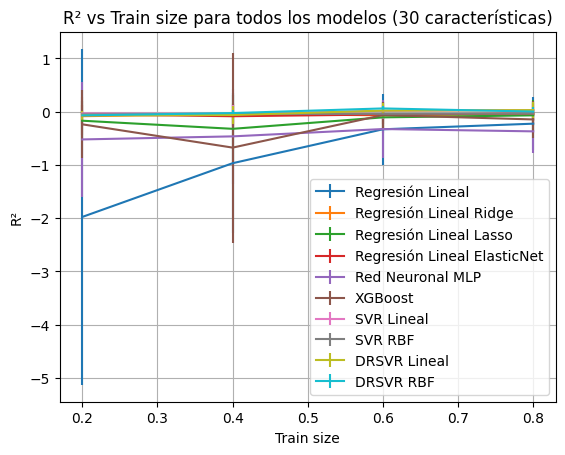

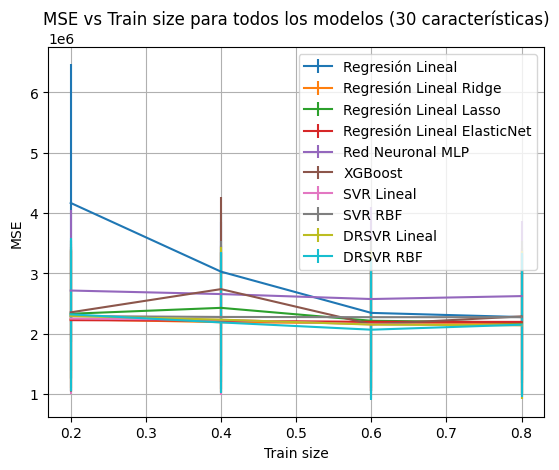

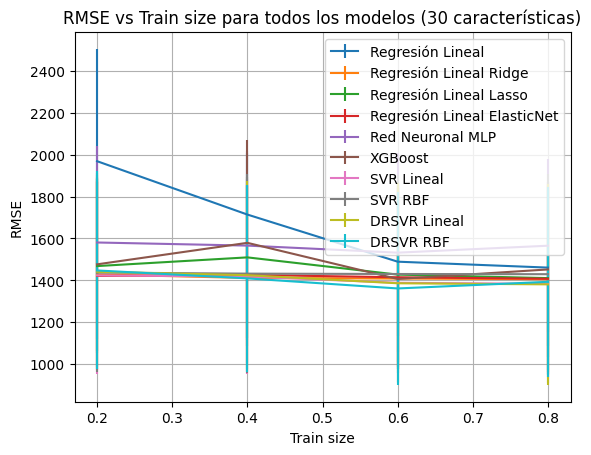

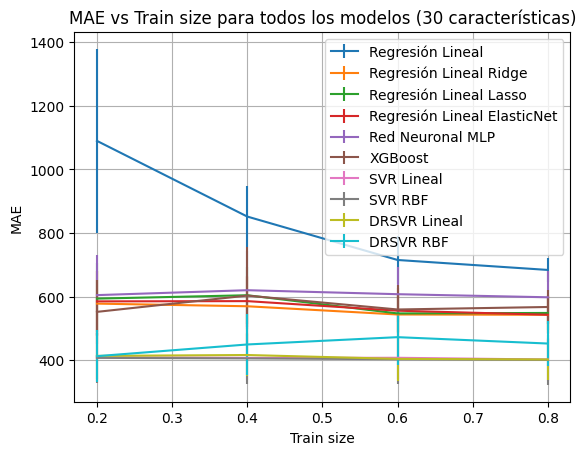

FileNotFoundError: [Errno 2] No such file or directory: 'R2_vs_train_size.png'

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

# --- Inicializar estructura unificada ---
model_names = ["Regresión Lineal", "Ridge", "Lasso",
               "Elastic Net", "Red Neuronal MLP", "XGBoost",
               "KNN", "SVR Lineal", "SVR RBF", "DRSVR Lineal", "DRSVR RBF"]
training_sizes = [0.25, 0.5, 0.75, 1.0]

i = 5
X = grupos[i].drop(columns=["PIB (MCLP)"])
y = grupos[i]["PIB (MCLP)"]
num_cols = get_non_binary_columns(X.drop(columns = ["cultivo_principal"]))

metrics = {
    model: {
        "r2": {"mean": [], "std": []},
        "mse": {"mean": [], "std": []},
        "rmse": {"mean": [], "std": []},
        "mae": {"mean": [], "std": []},
    }
    for model in model_names
}
# Grillas
param_grid_elastic = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

mlp_param = {
    "hidden layers": [1, 2, 3],
    "hidden units": [16, 32, 64]
}

param_grid_xgboost = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

param_grid = {
    "regressor__n_neighbors": [3, 5, 7],
    "regressor__weights": ["uniform", "distance"],
    "regressor__p": [1, 2]  # distancia Manhattan o Euclidiana
}

param_grid_svr = {
    "regressor__C": [0.01, 0.1, 1, 10, 100],
    "regressor__epsilon": [0.001, 0.01, 0.1, 1]
}

param_grid_drsvr = {
    "rho": [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "repsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)

t_inicio = time.time()
for size in training_sizes:
    # Diccionarios temporales por corrida
    r2_scores = {model: [] for model in model_names}
    mse_scores = {model: [] for model in model_names}
    rmse_scores = {model: [] for model in model_names}
    mae_scores = {model: [] for model in model_names}

    print(f"Train size:\t{(size*0.8):.1f}\tSamples:\t{int(len(y)*(size*0.8))}")
    t_i = time.time()

    for seed in tqdm(range(20, 30)):
        X_batch, X_test, y_batch, y_test = train_test_split(
            X, y,
            test_size= 0.2,
            stratify=df["cultivo_principal"],
            random_state=seed
        )
        if size < 1.0:
          X_train, _, y_train, _ = train_test_split(
              X_batch, y_batch,
              train_size = size,
              stratify= X_batch["cultivo_principal"],
              random_state= 42
          )
        else:
          X_train = X_batch
          y_train = y_batch

        X_train = X_train.drop(columns=["cultivo_principal"])
        X_test = X_test.drop(columns=["cultivo_principal"])

        # === 1. Regresión Lineal ===
        model_linear = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", LinearRegression())
        ])
        model_linear.fit(X_train, y_train)
        y_pred = model_linear.predict(X_test)

        r2_scores["Regresión Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["Regresión Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Regresión Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Regresión Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 2. Regresión Lineal Ridge ===
        model_ridge = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", RidgeCV(alphas = np.logspace(-3, 3, 50), cv=5))
        ])
        model_ridge.fit(X_train, y_train)
        y_pred = model_ridge.predict(X_test)

        r2_scores["Ridge"].append(r2_score(y_test, y_pred))
        mse_scores["Ridge"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Ridge"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Ridge"].append(mean_absolute_error(y_test, y_pred))

        # === 3. Regresión Lineal Lasso ===
        model_lasso = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", LassoCV(alphas = np.logspace(-3, 3, 50), cv=5))
        ])
        model_lasso.fit(X_train, y_train)
        y_pred = model_lasso.predict(X_test)

        r2_scores["Lasso"].append(r2_score(y_test, y_pred))
        mse_scores["Lasso"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Lasso"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Lasso"].append(mean_absolute_error(y_test, y_pred))

        # === 4. Regresión Lineal ElasticNet ===
        model_elasticnet = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", ElasticNet(max_iter= 10000))
        ])
        grid_search = GridSearchCV(
            model_elastic,
            param_grid_elastic,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["Elastic Net"].append(r2_score(y_test, y_pred))
        mse_scores["Elastic Net"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Elastic Net"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Elastic Net"].append(mean_absolute_error(y_test, y_pred))

        # === 5. Red Neuronal MLP ===
        model_mlp, scaler_X, scaler_y, num_cols_mlp = MLP_NN(X_train, y_train, mlp_param, epochs=100, lr=1e-3, patience=10)

        # ---- Escalar solo numéricas del test ----
        X_test_scaled = X_test.copy()
        X_test_scaled[num_cols_mlp] = scaler_X.transform(X_test[num_cols_mlp])

        X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)

        # ---- Predicción ----
        model_mlp.eval()
        with torch.no_grad():
            y_pred_scaled = model_mlp(X_test_tensor).numpy()

        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = y_test.to_numpy().reshape(-1, 1)

        mse = mean_squared_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        r2_scores["Red Neuronal MLP"].append(r2)
        mse_scores["Red Neuronal MLP"].append(mse)
        rmse_scores["Red Neuronal MLP"].append(rmse)
        mae_scores["Red Neuronal MLP"].append(mae)

        # === 6. XGBoost ===
        model_xgb = xgb.XGBRegressor(verbosity = 0,objective = 'reg:squarederror')

        grid_search = GridSearchCV(
          estimator=model_xgb,
          param_grid=param_grid_xgboost,
          scoring="neg_mean_squared_error",  # MSE para regresión
          cv=5,
          verbose=0,
          n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_xgb = grid_search.best_estimator_
        best_xgb.fit(X_train, y_train)

        y_pred = best_xgb.predict(X_test)
        r2_scores["XGBoost"].append(r2_score(y_test, y_pred))
        mse_scores["XGBoost"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["XGBoost"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["XGBoost"].append(mean_absolute_error(y_test, y_pred))

        # === 7. KNN ===
        model_knn = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", KNeighborsRegressor())
        ])
        grid_search = GridSearchCV(
            model_knn,
            param_grid,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["KNN"].append(r2_score(y_test, y_pred))
        mse_scores["KNN"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["KNN"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["KNN"].append(mean_absolute_error(y_test, y_pred))

        # === 8. SVR Lineal ===
        pipeline_svr = get_pipeline_svr(num_cols)

        grid_search = GridSearchCV(
            pipeline_svr,
            param_grid_svr,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["SVR Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["SVR Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["SVR Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["SVR Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 9. SVR RBF ===
        pipeline_svr = get_pipeline_svr(num_cols, kernel="rbf")
        grid_search = GridSearchCV(
            pipeline_svr,
            param_grid_svr,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["SVR RBF"].append(r2_score(y_test, y_pred))
        mse_scores["SVR RBF"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["SVR RBF"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["SVR RBF"].append(mean_absolute_error(y_test, y_pred))

        # === 10. SVR DRO Lineal ===
        X_train_scaled = preprocess_drsvr.fit_transform(X_train)
        X_test_scaled = preprocess_drsvr.transform(X_test)

        data = {'x': X_train_scaled, 'y': y_train.to_numpy()}
        w, b = SVR_DRO(param, data)
        y_pred = X_test_scaled.dot(w) + b

        r2_scores["DRSVR Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["DRSVR Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["DRSVR Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["DRSVR Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 11. SVR DRO RBF ===
        gamma = gamma_scale(X_train_scaled)
        kernel_train = rbf_kernel(X_train_scaled, gamma=gamma)
        kernel_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=gamma)
        data = {'K': kernel_train, 'y': y_train.to_numpy()}
        alpha = SVR_DRO(param, data, kernel='rbf')

        y_pred = kernel_test.dot(alpha)
        r2_scores["DRSVR RBF"].append(r2_score(y_test, y_pred))
        mse_scores["DRSVR RBF"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["DRSVR RBF"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["DRSVR RBF"].append(mean_absolute_error(y_test, y_pred))

    t_f = time.time()
    print(f"Tiempo de ejecución: {t_f - t_i:.2f} s")

    # Guardar promedios y desviaciones en el diccionario unificado
    for model in model_names:
        metrics[model]["r2"]["mean"].append(np.mean(r2_scores[model]))
        metrics[model]["r2"]["std"].append(np.std(r2_scores[model]))

        metrics[model]["mse"]["mean"].append(np.mean(mse_scores[model]))
        metrics[model]["mse"]["std"].append(np.std(mse_scores[model]))

        metrics[model]["mae"]["mean"].append(np.mean(mae_scores[model]))
        metrics[model]["mae"]["std"].append(np.std(mae_scores[model]))

        metrics[model]["rmse"]["mean"].append(np.mean(rmse_scores[model]))
        metrics[model]["rmse"]["std"].append(np.std(rmse_scores[model]))

t_final = time.time()
print(f"Tiempo total de ejecución: {t_final - t_inicio:.2f} s")
T_e = t_final - t_inicio

filenames_imgs = [
    "R2_vs_train_size.png",
    "MSE_vs_train_size.png",
    "RMSE_vs_train_size.png",
    "MAE_vs_train_size.png"
]
crear_csv_metricas(metrics)
crear_graficos(metrics)
notificar_fin(MAIL, PASSWORD, T_e, filenames_imgs)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X_p = X.drop(columns=["cultivo_principal"])
mi = mutual_info_regression(X_p, y, discrete_features=[X_p[col].nunique() == 2 for col in X_p.columns], random_state = 42)
mi_series = pd.Series(mi, index=X_p.columns)
mi_series.sort_values(ascending=False, inplace=True)
top_30_features = mi_series.head(30).index.tolist()
print(mi_series)
print(top_30_features)

Superficie de secano (Ha)         1.358337e-01
Superficie de riego (Ha)          1.237813e-01
terreno trabajado (Ha)            1.115215e-01
Papa                              9.802127e-02
porcentaje miembros               8.707086e-02
porcentaje no miembros            8.154129e-02
porcentaje permanentes            7.322096e-02
Galpones                          7.071759e-02
Macrozona 3                       6.277640e-02
porcentaje ocasionales            5.710431e-02
porcentaje hombres                5.498190e-02
fuente canal                      5.415689e-02
Superficie de invernadero (m2)    5.172805e-02
Motobombas                        4.622847e-02
Maíz                              4.533294e-02
Ganado                            4.391924e-02
Tractores                         4.354545e-02
Macrozona 6                       4.065416e-02
porcentaje mujeres                3.935857e-02
sexo jefe de hogar                3.402140e-02
edad promedio miembros            3.293238e-02
Macrozona 4  

Train size:	0.2	Samples:	143


100%|██████████| 10/10 [01:59<00:00, 11.92s/it]


Tiempo de ejecución: 119.21 s
Train size:	0.4	Samples:	287


100%|██████████| 10/10 [06:42<00:00, 40.23s/it]


Tiempo de ejecución: 402.33 s
Train size:	0.6000000000000001	Samples:	430


100%|██████████| 10/10 [15:07<00:00, 90.78s/it]


Tiempo de ejecución: 907.76 s
Train size:	0.8	Samples:	574


100%|██████████| 10/10 [30:20<00:00, 182.09s/it]


Tiempo de ejecución: 1820.87 s
Tiempo total de ejecución: 3250.19 s
Archivo CSV creado: metrics_selected_summary.csv


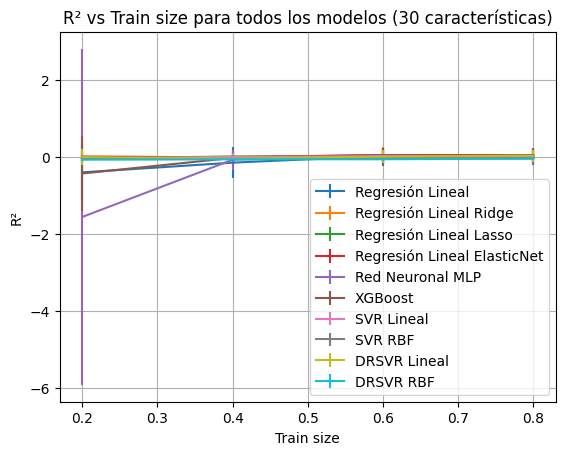

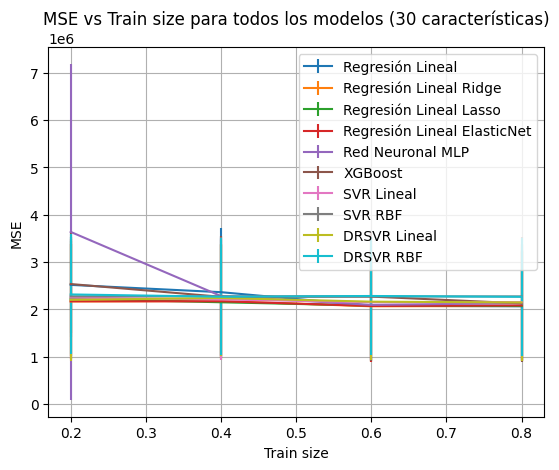

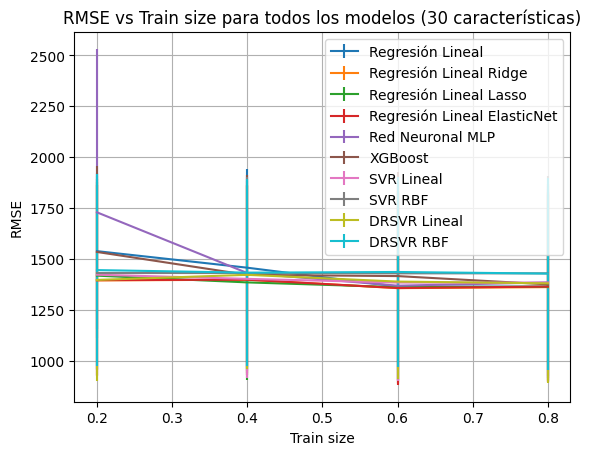

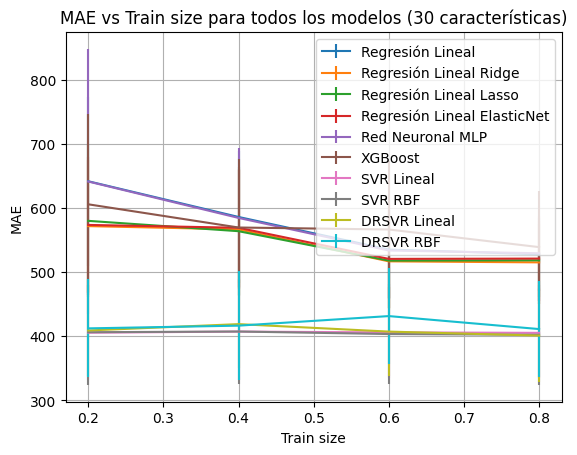

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.feature_selection import mutual_info_regression

# VERSIÓN CON SELECCIÓN DE CARACTERÍSTICAS
# --- Inicializar estructura unificada ---
model_names = ["Regresión Lineal", "Regresión Lineal Ridge", "Regresión Lineal Lasso",
               "Regresión Lineal ElasticNet", "Red Neuronal MLP", "XGBoost",
               "SVR Lineal", "SVR RBF", "DRSVR Lineal", "DRSVR RBF"]

metrics = {
    model: {
        "r2": {"mean": [], "std": []},
        "mse": {"mean": [], "std": []},
        "rmse": {"mean": [], "std": []},
        "mae": {"mean": [], "std": []},
    }
    for model in model_names
}
# Grillas
param_grid_elastic = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

mlp_param = {
    "hidden layers": [1, 2, 3],
    "hidden units": [16, 32, 64]
}

param_grid_xgboost = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]
}

param_grid_svr = {
    "regressor__C": [0.01, 0.1, 1, 10, 100],
    "regressor__epsilon": [0.001, 0.01, 0.1, 1]
}


param_grid_drsvr = {
    'rho': [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "epsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)

training_sizes = [0.25, 0.5, 0.75, 1.0]

X = df.drop(columns=["produccion (kg)", "folio_interno", "Unnamed: 0", "PIB (MCLP)", "PIB (CLP)", "Macrozona"])
y = df["PIB (MCLP)"]

t_inicio = time.time()
for size in training_sizes:
    # Diccionarios temporales por corrida
    r2_scores = {model: [] for model in model_names}
    mse_scores = {model: [] for model in model_names}
    rmse_scores = {model: [] for model in model_names}
    mae_scores = {model: [] for model in model_names}

    print(f"Train size:\t{size*0.8}\tSamples:\t{int(len(y)*size*0.8)}")
    t_i = time.time()

    for seed in tqdm(range(20, 30)):
        X_batch, X_test, y_batch, y_test = train_test_split(
            X, y,
            test_size= 0.2,
            stratify=df["cultivo_principal"],
            random_state=seed
        )
        if size < 1.0:
          X_train, _, y_train, _ = train_test_split(
              X_batch, y_batch,
              train_size = size,
              stratify= X_batch["cultivo_principal"],
              random_state= 42
          )
        else:
          X_train = X_batch
          y_train = y_batch

        X_train = X_train.drop(columns=["cultivo_principal"])
        X_test = X_test.drop(columns=["cultivo_principal"])

        mi = mutual_info_regression(X_train, y_train, discrete_features=[X_train[col].nunique() == 2 for col in X_train.columns], random_state = 42)
        mi_series = pd.Series(mi, index=X_train.columns)
        mi_series.sort_values(ascending=False, inplace=True)
        top_30_features = mi_series.head(10).index.tolist()

        X_train = X_train[top_30_features]
        X_test = X_test[top_30_features]

        # selector = SelectKBest(f_regression, k=30)
        # X_train_new = selector.fit_transform(X_train, y_train)
        # X_test_new = selector.transform(X_test)

        # # Obtener nombres de columnas seleccionadas
        # selected_cols = X_train.columns[selector.get_support()]
        # # print(selected_cols)

        # X_train = pd.DataFrame(X_train_new, columns=selected_cols)
        # X_test = pd.DataFrame(X_test_new, columns=selected_cols)

        # === 1. Regresión Lineal ===
        num_cols = get_non_binary_columns(X_train)

        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), num_cols)
        ], remainder= "passthrough")


        model_linear = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", LinearRegression())
        ])
        model_linear.fit(X_train, y_train)
        y_pred = model_linear.predict(X_test)

        r2_scores["Regresión Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["Regresión Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Regresión Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Regresión Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 2. Regresión Lineal Ridge ===
        model_ridge = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", RidgeCV(alphas = np.logspace(-3, 3, 50), cv=5))
        ])
        model_ridge.fit(X_train, y_train)
        y_pred = model_ridge.predict(X_test)

        r2_scores["Regresión Lineal Ridge"].append(r2_score(y_test, y_pred))
        mse_scores["Regresión Lineal Ridge"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Regresión Lineal Ridge"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Regresión Lineal Ridge"].append(mean_absolute_error(y_test, y_pred))

        # === 3. Regresión Lineal Lasso ===
        model_lasso = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", LassoCV(alphas = np.logspace(-3, 3, 50), cv=5))
        ])
        model_lasso.fit(X_train, y_train)
        y_pred = model_lasso.predict(X_test)

        r2_scores["Regresión Lineal Lasso"].append(r2_score(y_test, y_pred))
        mse_scores["Regresión Lineal Lasso"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Regresión Lineal Lasso"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Regresión Lineal Lasso"].append(mean_absolute_error(y_test, y_pred))

        # === 4. Regresión Lineal ElasticNet ===
        model_elasticnet = Pipeline([
            ("preprocess", preprocessor),
            ("regressor", ElasticNet(max_iter= 10000))
        ])
        grid_search = GridSearchCV(
            model_elasticnet,
            param_grid_elastic,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["Regresión Lineal ElasticNet"].append(r2_score(y_test, y_pred))
        mse_scores["Regresión Lineal ElasticNet"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["Regresión Lineal ElasticNet"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["Regresión Lineal ElasticNet"].append(mean_absolute_error(y_test, y_pred))

        # === 5. Red Neuronal MLP ===
        model_mlp, scaler_X, scaler_y, num_cols = MLP_NN(X_train, y_train, mlp_param, epochs=100, lr=1e-3, patience=10)

        # ---- Escalar solo numéricas del test ----
        X_test_scaled = X_test.copy()
        X_test_scaled[num_cols] = scaler_X.transform(X_test[num_cols])

        X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)

        # ---- Predicción ----
        model_mlp.eval()
        with torch.no_grad():
            y_pred_scaled = model_mlp(X_test_tensor).numpy()

        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_true = y_test.to_numpy().reshape(-1, 1)

        mse = mean_squared_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        r2_scores["Red Neuronal MLP"].append(r2)
        mse_scores["Red Neuronal MLP"].append(mse)
        rmse_scores["Red Neuronal MLP"].append(rmse)
        mae_scores["Red Neuronal MLP"].append(mae)

        # === 6. XGBoost ===
        model_xgb = xgb.XGBRegressor(verbosity = 0,objective = 'reg:squarederror')

        grid_search = GridSearchCV(
          estimator=model_xgb,
          param_grid=param_grid_xgboost,
          scoring="neg_mean_squared_error",  # MSE para regresión
          cv=5,
          verbose=0,
          n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_xgb = grid_search.best_estimator_
        best_xgb.fit(X_train, y_train)

        y_pred = best_xgb.predict(X_test)
        r2_scores["XGBoost"].append(r2_score(y_test, y_pred))
        mse_scores["XGBoost"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["XGBoost"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["XGBoost"].append(mean_absolute_error(y_test, y_pred))

        # === 7. SVR Lineal ===
        pipeline_svr = get_pipeline_svr(num_cols=num_cols)

        grid_search = GridSearchCV(
            pipeline_svr,
            param_grid_svr,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["SVR Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["SVR Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["SVR Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["SVR Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 8. SVR RBF ===
        pipeline_svr = get_pipeline_svr(num_cols= num_cols,kernel="rbf")
        grid_search = GridSearchCV(
            pipeline_svr,
            param_grid_svr,
            cv=5,
            scoring="r2",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)
        r2_scores["SVR RBF"].append(r2_score(y_test, y_pred))
        mse_scores["SVR RBF"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["SVR RBF"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["SVR RBF"].append(mean_absolute_error(y_test, y_pred))

        # === 9. SVR DRO Lineal ===
        preprocess_drsvr = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
        ],
        remainder="passthrough"  # las demás columnas pasan sin cambios
        )
        X_train_scaled = preprocess_drsvr.fit_transform(X_train)
        X_test_scaled = preprocess_drsvr.transform(X_test)

        data = {'x': X_train_scaled, 'y': y_train.to_numpy()}
        w, b = SVR_DRO(param_grid_drsvr, data)
        y_pred = X_test_scaled.dot(w) + b

        r2_scores["DRSVR Lineal"].append(r2_score(y_test, y_pred))
        mse_scores["DRSVR Lineal"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["DRSVR Lineal"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["DRSVR Lineal"].append(mean_absolute_error(y_test, y_pred))

        # === 10. SVR DRO RBF ===
        gamma = gamma_scale(X_train_scaled)
        kernel_train = rbf_kernel(X_train_scaled, gamma=gamma)
        kernel_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=gamma)
        data = {'K': kernel_train, 'y': y_train.to_numpy()}
        alpha = SVR_DRO(param_grid_drsvr, data, kernel='rbf')

        y_pred = kernel_test.dot(alpha)
        r2_scores["DRSVR RBF"].append(r2_score(y_test, y_pred))
        mse_scores["DRSVR RBF"].append(mean_squared_error(y_test, y_pred))
        rmse_scores["DRSVR RBF"].append(root_mean_squared_error(y_test, y_pred))
        mae_scores["DRSVR RBF"].append(mean_absolute_error(y_test, y_pred))

    t_f = time.time()
    T_e = t_f - t_i
    print(f"Tiempo de ejecución: {T_e:.2f} s")

    # Guardar promedios y desviaciones en el diccionario unificado
    for model in model_names:
        metrics[model]["r2"]["mean"].append(np.mean(r2_scores[model]))
        metrics[model]["r2"]["std"].append(np.std(r2_scores[model]))

        metrics[model]["mse"]["mean"].append(np.mean(mse_scores[model]))
        metrics[model]["mse"]["std"].append(np.std(mse_scores[model]))

        metrics[model]["mae"]["mean"].append(np.mean(mae_scores[model]))
        metrics[model]["mae"]["std"].append(np.std(mae_scores[model]))

        metrics[model]["rmse"]["mean"].append(np.mean(rmse_scores[model]))
        metrics[model]["rmse"]["std"].append(np.std(rmse_scores[model]))

t_final = time.time()
print(f"Tiempo total de ejecución: {t_final - t_inicio:.2f} s")
T_e = t_final - t_inicio

crear_csv_metricas(metrics, filename = "metrics_selected_summary")
crear_graficos(metrics)

paths_imgs = ["/content/R2_vs_train_size_selected.png",
    "/content/MSE_vs_train_size_selected.png",
    "/content/RMSE_vs_train_size_selected.png",
    "/content/MAE_vs_train_size_selected.png"]
notificar_fin(MAIL, PASSWORD, T_e, paths_imgs, filename_csv = "/content/metrics_selected_summary.csv")



In [ ]:
# Modelos específicos por producto
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

# --- Inicializar estructura unificada ---
model_names = ["Regresión Lineal", "Regresión Lineal Ridge", "Regresión Lineal Lasso",
               "Regresión Lineal ElasticNet", "Red Neuronal MLP", "XGBoost",
               "SVR Lineal", "SVR RBF", "DRSVR Lineal", "DRSVR RBF"]

productos = ["Trigo", "Maíz", "Tomate", "Papa", "Cebolla"]


# df_new = pd.read_csv("/content/df_final.csv")

# df_new = df_new[~df_new.isin(["ns/nr"]).any(axis=1)].copy()
# cols_to_convert = ["Superficie de secano (Ha)",
#                    "Superficie de aire libre (m2)",
#                    "Superficie de invernadero (m2)"]

# for col in cols_to_convert:
#     df_new[col] = pd.to_numeric(df_new[col], errors="coerce")

# df_new["cultivo_principal"] = (
#     df_new[["Maíz", "Trigo", "Papa", "Tomate", "Cebolla"]]
#     .idxmax(axis=1)
# )

df["Macrozona"] = (
    df[["Macrozona 1", "Macrozona 2", "Macrozona 3", "Macrozona 4", "Macrozona 5", "Macrozona 6", "Macrozona 7"]]
    .idxmax(axis=1)
)
df_papa = df[df["cultivo_principal"] == "Papa"]
df_papa = df_papa.drop(columns = ["Maíz", "Trigo", "Papa", "Tomate", "Cebolla"])

X = df_papa.drop(columns=["produccion (kg)","Unnamed: 0","cultivo_principal","folio_interno", "PIB (CLP)", "PIB (MCLP)", "Macrozona"])
y = df_papa["PIB (MCLP)"]

y_log = np.log1p(y)

r2_scores = {model: [] for model in model_names}
mse_scores = {model: [] for model in model_names}
rmse_scores = {model: [] for model in model_names}
mae_scores = {model: [] for model in model_names}

num_cols = get_non_binary_columns(X)

preprocess_drsvr = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)  # solo estas columnas se escalan
    ],
    remainder="passthrough"  # las demás columnas pasan sin cambios
)
param_grid_drsvr = {
    "rho": [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    "epsilon": [0.001, 0.01, 0.1, 1],
    "pnorm": 1
}

t_inicio = time.time()
for seed in tqdm(range(20, 21)):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size= 0.9,
        random_state=seed
    )

    X_train_scaled = preprocess_drsvr.fit_transform(X_train)
    X_test_scaled = preprocess_drsvr.transform(X_test)
    data = {'x': X_train_scaled, 'y': y_train.to_numpy()}
    w, b = SVR_DRO(param_grid_drsvr, data, kernel='linear')
    y_pred = X_test_scaled.dot(w) + b
    # gamma = gamma_scale(X_train_scaled)
    # kernel_train = rbf_kernel(X_train_scaled, gamma=gamma)
    # kernel_test = rbf_kernel(X_test_scaled, X_train_scaled, gamma=gamma)
    # data = {'K': kernel_train, 'y': y_train.to_numpy()}
    # alpha = SVR_DRO(param_grid_drsvr, data, kernel='rbf')

    # y_pred = kernel_test.dot(alpha)

    r2, mse, rmse, mae = metricas(y_test, y_pred, "SVR DRO Lineal")
    for i, item in enumerate(zip(y_test, y_pred)):
        print(f"Real: {item[0]}\tPred: {item[1]}")



/tmp/ipython-input-2677458881.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Macrozona"] = (
100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

🔹 Resultados del modelo de SVR DRO Lineal:
R²:  -1960.2267
MSE: 127591.04
RMSE: 357.20
MAE: 145.64
Real: 0.0225	Pred: 64.14285714285714
Real: 10.0	Pred: 79.61904761904762
Real: 150.0	Pred: 56.095238095238095
Real: 72.0	Pred: 75.90476190476191
Real: 200.0	Pred: 59.80952380952381
Real: 40.0	Pred: 66.0
Real: 30.0	Pred: 53.61904761904762
Real: 420.0	Pred: 64.76190476190476
Real: 126.5	Pred: 72.19047619047619
Real: 75.0	Pred: 54.23809523809524
Real: 60.0	Pred: 61.666666666666664
Real: 15.0	Pred: 64.76190476190476
Real: 15.0	Pred: 59.80952380952381
Real: 195.0	Pred: 61.666666666666664
Real: 12.0	Pred: 57.333333333333336
Real: 70.0	Pred: 67.23809523809524
Real: 400.0	Pred: 77.76190476190476
Real: 60.0	Pred: 46.80952380952381
Real: 180.0	Pred: 64.14285714285714
Real: 12.5	Pred: 65.38095238095238
Real: 87.5	Pred: 74.66666666666667
Real: 54.0	Pred: 63.523809523809526
Real: 0.02	Pred: 58.57142857142857
Real: 9.0	Pred: 60.42857142857143
Real: 100.0	Pred: 69.71428571428572
Real: 20.0	Pred: 68.47619